# Анализ рынка недвижимости

## Оглавление
<a id = "index"></a>

1. [Задание](#task)
1. [Описание данных](#data_description)
1. [Настройка окружения](#env)
1. [Загрузка и первичное изучение данных](#first_look)
1. [Подготовка данных](#etl)
1. [Исследовательский анализ данных](#eda)
1. [Выводы и рекомендации](#conclusion)

## Задание
<a id = "task"></a>
[В оглавление](#index)

Для анализа есть данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости и установить параметры для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности.

__План исследования:__

1. Импорт библиотек и общая предустановка.
- Загрузка и общее изучение данных.
- Предобработка данных.
- Рассчет дополнительных параметров, необходимых для анализа.
- Исследовательский анализ данных.
- Консолидированный вывод.

## Описание данных
<a id = "data_description"></a>
[В оглавление](#index)

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Настройка окружения
<a id = "env"></a>
[В оглавление](#index)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy

import seaborn as sns

In [2]:
# отключение предупреждений Anaconda (мне кажется, что из-за этого некоррктно переводится один тип данных в другой)
warnings.simplefilter('ignore')

# размер графиков по умолчанию
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

# установка показа максимального количества столбцов в датафрейме
pd.set_option('display.max_columns', None)

## Загрузка и первичное изучение данных
<a id = "first_look"></a>
[В оглавление](#index)

In [3]:
df_realty = pd.read_csv('real_estate_data.csv', sep = '\t')

In [4]:
df_realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# изначальный размер массива 
raw_data_len = len(df_realty)

In [6]:
df_realty.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9466,9,5800000.0,45.0,2018-02-01T00:00:00,1,2.75,10.0,18.0,8,NaN,False,False,10.0,NaN,Санкт-Петербург,39220.0,8479.0,0.0,NaN,1.0,821.0,155.0
11922,8,5500000.0,47.0,2018-10-20T00:00:00,1,2.80,24.0,22.0,16,NaN,False,False,13.0,NaN,Санкт-Петербург,44382.0,16921.0,0.0,NaN,0.0,NaN,31.0
4753,13,3920000.0,39.0,2018-09-08T00:00:00,1,NaN,16.0,17.8,3,NaN,False,False,10.0,NaN,Санкт-Петербург,21137.0,22849.0,0.0,NaN,2.0,348.0,20.0
23024,5,2330000.0,32.0,2017-01-26T00:00:00,1,2.60,5.0,18.0,1,False,False,False,6.0,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,45.0
3857,15,5500000.0,44.9,2018-01-19T00:00:00,1,2.70,24.0,15.0,9,NaN,False,False,10.0,2.0,Санкт-Петербург,18695.0,16268.0,1.0,51.0,1.0,344.0,61.0
17405,3,2620000.0,26.0,2018-08-28T00:00:00,1,NaN,25.0,18.3,16,NaN,False,False,NaN,NaN,Санкт-Петербург,23654.0,25366.0,0.0,NaN,1.0,607.0,63.0
5266,4,4650000.0,43.0,2017-06-28T00:00:00,1,NaN,15.0,18.0,15,NaN,False,False,10.0,0.0,Санкт-Петербург,13990.0,12786.0,0.0,NaN,0.0,NaN,72.0
2870,10,2150000.0,54.0,2019-03-05T00:00:00,2,2.50,5.0,29.0,2,NaN,False,False,8.5,2.0,поселок Молодцово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
14783,9,3790000.0,49.0,2015-10-20T00:00:00,4,NaN,5.0,35.0,1,NaN,False,False,6.0,0.0,Санкт-Петербург,9970.0,12138.0,0.0,NaN,0.0,NaN,306.0
16844,7,4400000.0,44.0,2018-03-21T00:00:00,2,2.60,9.0,27.0,6,NaN,False,False,7.0,2.0,Санкт-Петербург,46277.0,13906.0,1.0,333.0,1.0,397.0,45.0


### Вывод по разделу

* Исходные данные в файле CSV изначально разделены знаком обратной табуляции.
* Во многих столбцах пропущены данные. 
- __Детальный анализ причин возникновения пропусков и их заполнение с учётом специфики столбца будут выполнены на этапе "Предобработка данных"__.

## Подготовка данных
<a id = "etl"></a>
[В оглавление](#index)

In [7]:
# проверка дубликатов
df_realty.duplicated().sum()

0

In [8]:
# создание функции для повторяющихся действий по проверке столбцов 
def column_check(column):
    missed = (df_realty[column].isna() == True).sum()
    print()
    print('Тип столбца {}: {}'.format(column, df_realty.dtypes[column])) 
    print()
    print('--------------------')
    print()    
    print('По столбцу {} пропущено {} записей.'.format(column, missed))
    print('Это {:.1%} от всех записей.'.format(missed/len(df_realty)))
    print()
    print('--------------------')
    print()
    print('Состав столбца {}:'.format(column))
    print()
    print(df_realty[column].value_counts().sort_index())
    print()
    print('--------------------')
    print()
    print('Описание столбца {}:'.format(column))
    print()
    print(df_realty[column].describe())
    print()
    print('--------------------')
    print()
    try:
        if df_realty[column].dtypes == 'int64' or df_realty[column].dtypes == 'float64':
            print('Распределение столбца {}:'.format(column))
            df_realty.boxplot(column=column, figsize=(12,9))
            #plt.title('Распределения средней цены недвижимости в зависимости от расстояния от центра СПб')
            #plt.xlabel('Расстояние от центра СПб, км')
            #plt.ylabel('Средняя цена недвижимости')
            plt.show()
        else:
            print('Данные столбца "{}" не подходят для построения графика boxplot.'.format(column))
    except:
        print("Необходимо внимание")
       


In [9]:
# создание пустого датафрейма для дальнейшей проверки
indexes_to_check = pd.DataFrame(columns=['index', 'reason'])

In [10]:
# создание функции для добавления записей в пустые датафреймы
def add_to_df(indexes, reason, source):
    for i in indexes:
        row = pd.DataFrame([[i, reason]], columns=['index', 'reason'])
        source = source.append(row, ignore_index=True)
    return source

### Столбец total_images


Тип столбца total_images: int64

--------------------

По столбцу total_images пропущено 0 записей.
Это 0.0% от всех записей.

--------------------

Состав столбца total_images:

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

--------------------

Описание столбца total_images:

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

--------------------

Распределение столбца total_images:


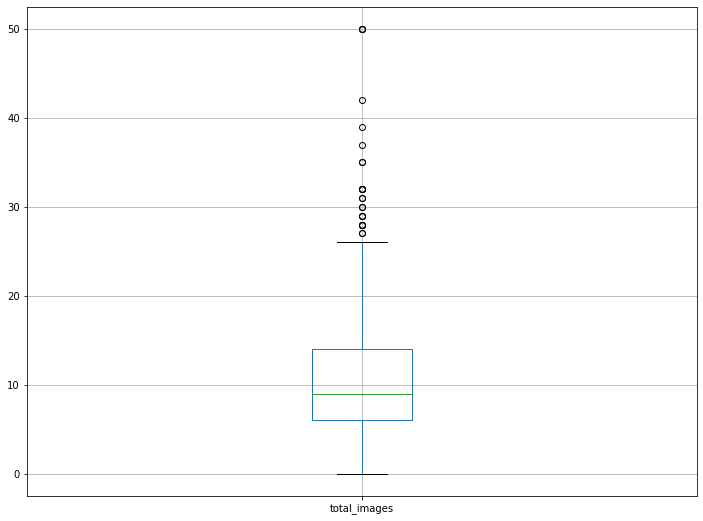

In [11]:
# общая проверка столбца
column_check('total_images')

In [12]:
# общая проверка объявлений без фото
df_realty.query('total_images == 0').sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22602,0,2000000.0,67.0,2018-03-28T00:00:00,2,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21811,0,3300000.0,57.0,2017-11-10T00:00:00,2,NaN,2.0,28.0,1,NaN,False,False,7.0,NaN,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,53.0
11826,0,3550000.0,46.0,2017-06-22T00:00:00,2,2.70,5.0,32.0,3,NaN,False,False,7.3,0.0,Санкт-Петербург,24983.0,14879.0,0.0,NaN,0.0,NaN,18.0
4253,0,6690000.0,66.0,2018-11-14T00:00:00,3,2.58,14.0,43.0,10,NaN,False,False,NaN,NaN,Санкт-Петербург,12835.0,15427.0,0.0,NaN,0.0,NaN,72.0
11795,0,6550000.0,57.4,2018-07-29T00:00:00,2,2.70,12.0,33.2,8,NaN,False,False,9.4,2.0,Санкт-Петербург,21176.0,15470.0,0.0,NaN,2.0,423.0,41.0
15734,0,25398000.0,93.0,2015-10-27T00:00:00,2,NaN,9.0,57.0,8,NaN,False,False,12.0,1.0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,272.0
15267,0,6700000.0,81.0,2017-04-14T00:00:00,3,NaN,5.0,NaN,3,NaN,False,False,NaN,0.0,Санкт-Петербург,29407.0,8109.0,1.0,702.0,1.0,974.0,42.0
5528,0,3000000.0,63.0,2018-08-14T00:00:00,3,NaN,5.0,42.0,4,NaN,False,False,11.0,NaN,Приозерск,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16031,0,4990000.0,45.0,2019-04-29T00:00:00,1,2.60,16.0,20.0,7,NaN,False,False,13.0,1.0,Санкт-Петербург,25987.0,14195.0,1.0,389.0,0.0,NaN,NaN
10641,0,4800000.0,43.4,2017-05-18T00:00:00,1,2.70,16.0,20.3,15,NaN,False,False,11.0,0.0,Санкт-Петербург,11794.0,14386.0,0.0,NaN,1.0,416.0,20.0


In [13]:
# установка максимального кол-ва фото для загрузки
# На момент выполнения задания в мае 2020 г., максимально возможное количество фото для загрузки в Яндекс.Недвижимость — 30 шт. 
images_upload_max = 30

In [14]:
# количетсво объявлений с загруженными фото более максимального количества
len(df_realty.query('total_images > @images_upload_max'))

14

In [15]:
# общая проверка объявлений с количеством более максимального
df_realty.query('total_images > @images_upload_max')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
99,32,9600000.0,90.0,2017-09-26T00:00:00,4,NaN,5.0,67.0,2,NaN,False,False,8.0,NaN,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104.0
308,35,5700000.0,83.9,2018-02-01T00:00:00,3,2.6,5.0,51.8,2,NaN,False,False,9.6,NaN,Красное Село,27245.0,30670.0,0.0,NaN,0.0,NaN,47.0
1058,39,1900000.0,63.0,2017-09-29T00:00:00,3,NaN,5.0,44.2,5,NaN,False,False,6.3,1.0,деревня Лопухинка,NaN,NaN,NaN,NaN,NaN,NaN,106.0
5349,31,11990000.0,92.5,2017-12-07T00:00:00,3,NaN,25.0,51.4,22,NaN,False,False,15.0,1.0,Санкт-Петербург,30546.0,11209.0,1.0,433.0,1.0,700.0,47.0
7393,32,8290000.0,113.2,2017-04-28T00:00:00,4,NaN,6.0,70.4,4,NaN,False,False,10.4,NaN,Санкт-Петербург,24177.0,2342.0,2.0,356.0,3.0,457.0,225.0
7938,32,17000000.0,150.0,2017-09-26T00:00:00,3,3.5,6.0,99.3,4,NaN,False,False,16.0,NaN,Санкт-Петербург,24980.0,3555.0,0.0,NaN,0.0,NaN,165.0
9778,50,11000000.0,87.0,2017-10-25T00:00:00,2,NaN,25.0,32.5,11,NaN,False,False,31.0,5.0,Санкт-Петербург,9586.0,11649.0,0.0,NaN,0.0,NaN,3.0
10523,35,17000000.0,90.0,2017-11-10T00:00:00,3,NaN,16.0,52.0,6,NaN,False,False,14.0,4.0,Санкт-Петербург,30215.0,6255.0,0.0,NaN,1.0,113.0,35.0
12667,50,20500000.0,76.0,2017-12-10T00:00:00,3,NaN,20.0,47.0,16,NaN,False,False,29.0,NaN,Санкт-Петербург,50812.0,16141.0,0.0,NaN,0.0,NaN,5.0
15157,42,17998000.0,138.6,2017-09-27T00:00:00,4,NaN,18.0,93.1,17,NaN,False,False,16.0,2.0,Санкт-Петербург,34991.0,11920.0,0.0,NaN,0.0,NaN,172.0


__Вывод по total_images:__
- Количество фото — целочисленные значения. Тип данных соответствует логике столбца. Изменение не требуется.
- Пропущенных значений не обнаружено.
- Объявления о продаже недвижимости без фото смотрятся странно. Возможные причины возникновения объявлений без фото:
    - техническая ошибка,
    - дом на стадии строительства,
    - недобросовестный продавец/риэлтор.
- Объявления о продаже недвижимости с количеством фотографий более 30 шт. похожи на техническую ошибку (на момент выполнения задания в мае 2020 г., максимально возможное количество фото для загрузки в Яндекс.Недвижимость — 30 шт.).


- __Необходима дополнительная проверка по компетенции причин возникновения записей:__
    - с количеством фото более 30 шт.;
    - объявлений без фото.

In [16]:
# добавление данных для будущей проверки
indexes_to_check = add_to_df(
    df_realty.query('total_images > @images_upload_max').index,
    'количество фото более {} шт.'.format(images_upload_max),
    indexes_to_check)

In [17]:
# добавление данных для для дальнейшей проверки на мошенничество
indexes_to_check = add_to_df(
    df_realty.query('total_images == 0').index,
    'отсутствие фото',
    indexes_to_check)

### Столбец last_price


Тип столбца last_price: float64

--------------------

По столбцу last_price пропущено 0 записей.
Это 0.0% от всех записей.

--------------------

Состав столбца last_price:

12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, Length: 2978, dtype: int64

--------------------

Описание столбца last_price:

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

--------------------

Распределение столбца last_price:


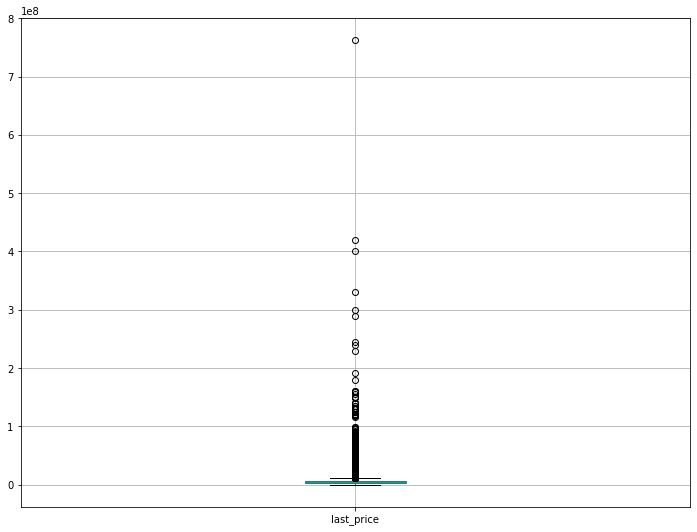

In [18]:
# общая проверка столбца
column_check('last_price')

__Вывод по last_price:__
* На момент выполнения задания в мае 2020 г. в Яндекс.Недвижимости отсутствует возможность введения в объявлении стоимости покупки недвижимости с точностью до копейки. Таким образом, тип данных в столбце требует перевода в целочисленный вид.
* Пропущенных значений не обнаружено.
- Наблюдается значительный разброс цен на недвижимость. __Выбросы в значениях будут исключены на этапе анализа.__

In [19]:
# перевод значений столбца в целочисленные значения
df_realty['last_price'] = df_realty['last_price'].astype('int64')

### Столбец total_area


Тип столбца total_area: float64

--------------------

По столбцу total_area пропущено 0 записей.
Это 0.0% от всех записей.

--------------------

Состав столбца total_area:

12.0     1
13.0     3
13.2     1
14.0     1
15.0     2
        ..
590.0    1
618.0    1
631.0    1
631.2    1
900.0    1
Name: total_area, Length: 2182, dtype: int64

--------------------

Описание столбца total_area:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

--------------------

Распределение столбца total_area:


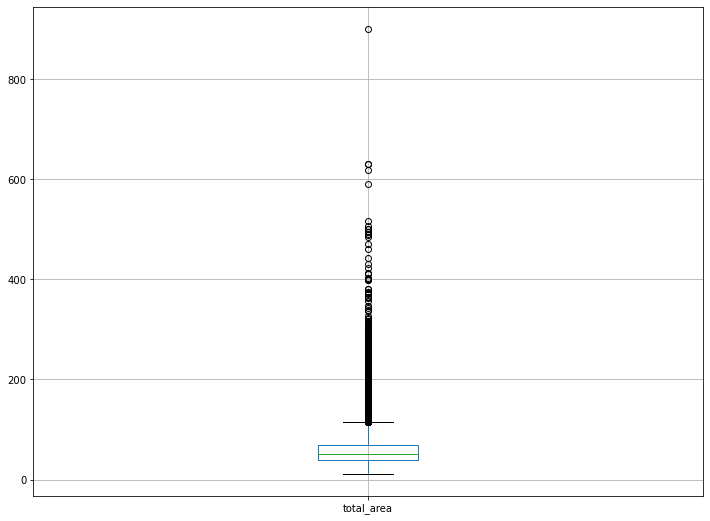

In [20]:
# общая проверка столбца
column_check('total_area')

In [21]:
# проверка записей с максимальными значениями общей площади
df_realty.sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,False,False,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,False,False,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,False,False,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
4237,1,50000000,517.0,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,False,False,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
8018,20,84000000,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,False,False,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
5893,3,230000000,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,False,False,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
15016,8,150000000,500.0,2016-01-13T00:00:00,4,3.20,7.0,NaN,7,NaN,False,False,NaN,0.0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
12401,20,91500000,495.0,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,False,False,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0


In [22]:
# проверка записей с минимальными значениями общей площади
df_realty.sort_values(by='total_area', ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,False,False,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
17961,3,1400000,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,False,False,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19807,0,3800000,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,False,False,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19558,2,1686000,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19642,5,1190000,14.0,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,NaN,False,False,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
16949,9,1550000,15.0,2018-08-21T00:00:00,1,2.70,9.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0
12040,5,1900000,15.0,2018-06-27T00:00:00,1,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
8886,10,2450000,15.5,2018-08-22T00:00:00,0,NaN,5.0,10.0,2,NaN,True,False,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9412,5,2100000,16.0,2017-12-10T00:00:00,0,NaN,6.0,13.0,1,NaN,False,True,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0


__Вывод по total_area:__
- Площадь квартиры может быть дробной. Тип данных соответствует логике столбца. Изменение не требуется.
- Пропущенных значений не обнаружено.
* Квартиры с __самыми высокими__ значениями общей площади — это пентхаусы: последний этаж, признак апартаментов.
* Квартиры с __самыми низкими__ значениями общей площади: скорее всего это микроквартиры (если есть кухня) или отдельные комнаты в коммунальных квартирах (признак — отсутствие кухни).
* Наблюдается значительный разброс значений. __Выбросы в значениях будут исключены на этапе анализа.__

### Столбец first_day_exposition

In [23]:
# общая проверка столбца
column_check('first_day_exposition')


Тип столбца first_day_exposition: object

--------------------

По столбцу first_day_exposition пропущено 0 записей.
Это 0.0% от всех записей.

--------------------

Состав столбца first_day_exposition:

2014-11-27T00:00:00    19
2014-11-29T00:00:00     1
2014-12-04T00:00:00     2
2014-12-05T00:00:00     1
2014-12-08T00:00:00     8
                       ..
2019-04-29T00:00:00    37
2019-04-30T00:00:00    27
2019-05-01T00:00:00    30
2019-05-02T00:00:00    11
2019-05-03T00:00:00    20
Name: first_day_exposition, Length: 1491, dtype: int64

--------------------

Описание столбца first_day_exposition:

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

--------------------

Данные столбца "first_day_exposition" не подходят для построения графика boxplot.


__Вывод по first_day_exposition:__
* Тип данных требует преобразования.
* Пропущенных значений не обнаружено.

In [24]:
# добавление корректной даты публикации объявления
df_realty['first_day_exposition'] = pd.to_datetime(df_realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Столбец rooms


Тип столбца rooms: int64

--------------------

По столбцу rooms пропущено 0 записей.
Это 0.0% от всех записей.

--------------------

Состав столбца rooms:

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

--------------------

Описание столбца rooms:

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

--------------------

Распределение столбца rooms:


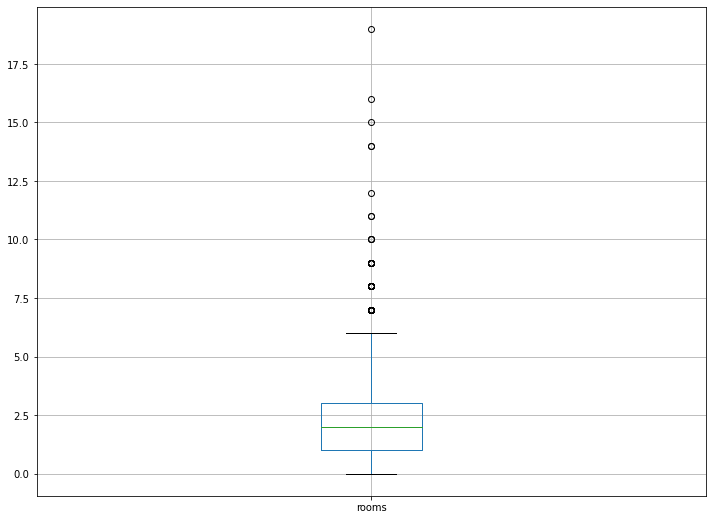

In [25]:
# стандартная проверка столбца
column_check('rooms')

In [26]:
# проверка квартир без комнат
df_realty.query('rooms == 0').sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9861,10,2350000,25.00,2017-12-03,0,NaN,22.0,25.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.0
11157,0,2900000,27.30,2017-11-22,0,2.80,8.0,20.0,5,NaN,False,True,NaN,NaN,Санкт-Петербург,38832.0,13729.0,0.0,NaN,0.0,NaN,9.0
10606,14,2950000,25.27,2017-11-17,0,NaN,25.0,25.0,11,NaN,False,True,NaN,1.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,51.0
21227,0,8200000,71.00,2017-07-21,0,5.80,5.0,68.0,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20054,5,2730000,21.00,2017-11-22,0,NaN,9.0,14.0,6,NaN,False,True,NaN,NaN,Санкт-Петербург,17048.0,5936.0,2.0,462.0,0.0,NaN,45.0
11035,1,2500000,26.00,2017-11-10,0,NaN,8.0,14.0,6,NaN,False,True,NaN,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,22.0
10729,4,2290000,28.00,2015-09-20,0,2.75,20.0,17.4,14,NaN,True,False,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,924.0
19154,8,2500000,23.80,2018-02-26,0,2.70,11.0,18.8,10,NaN,True,False,NaN,1.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,74.0
8718,10,4000000,26.00,2018-02-27,0,2.80,16.0,22.0,7,NaN,True,False,NaN,2.0,Санкт-Петербург,10796.0,14361.0,0.0,NaN,0.0,NaN,50.0
5187,5,3300000,25.40,2018-11-02,0,NaN,NaN,NaN,15,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [27]:
# проверка записей без комнат, но с большой площадью 
df_realty.query('rooms == 0').sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19392,5,71000000,371.00,2018-07-26,0,3.57,7.0,NaN,6,NaN,False,True,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
20082,10,16300000,98.40,2017-11-08,0,3.10,5.0,60.50,2,NaN,True,False,NaN,NaN,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
3458,6,7400000,73.60,2017-05-18,0,NaN,3.0,50.00,1,NaN,True,False,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
21227,0,8200000,71.00,2017-07-21,0,5.80,5.0,68.00,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
13613,16,8100000,58.40,2019-04-26,0,3.30,7.0,33.00,6,NaN,True,False,NaN,NaN,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
10008,20,5050000,44.20,2017-09-14,0,2.70,9.0,32.20,1,NaN,True,False,NaN,NaN,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0
15319,4,5970000,43.30,2017-07-20,0,2.80,9.0,28.20,2,NaN,True,False,NaN,2.0,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,30.0
7237,8,2999000,42.63,2017-11-27,0,NaN,16.0,25.70,2,NaN,False,True,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16130,14,5000000,42.10,2018-04-13,0,NaN,20.0,30.00,10,NaN,True,False,NaN,NaN,Санкт-Петербург,50605.0,15933.0,0.0,NaN,0.0,NaN,170.0
9052,12,3890000,38.30,2017-10-06,0,2.70,14.0,24.42,7,NaN,True,False,NaN,2.0,Санкт-Петербург,15493.0,14289.0,0.0,NaN,0.0,NaN,289.0


In [28]:
# проверка записей с большим ко-вом комнат
df_realty.sort_values(by='rooms', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270.0,2015-03-02,16,3.00,4.0,180.0,4,NaN,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
20829,6,28659000,245.4,2016-03-31,14,NaN,4.0,168.3,2,NaN,False,False,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
866,5,25000000,363.0,2017-12-23,14,3.16,5.0,222.0,4,NaN,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
9688,8,33000000,194.1,2017-02-07,11,3.43,5.0,129.0,2,NaN,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
648,3,17500000,183.7,2018-07-01,11,3.40,7.0,138.8,7,NaN,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
18119,4,15500000,216.1,2016-07-04,10,3.15,5.0,161.4,2,NaN,False,False,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
4149,6,23000000,272.6,2018-01-11,10,3.14,7.0,145.9,7,NaN,False,False,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN


__Вывод по rooms:__
- Количество комнат — целочисленное значение. Тип данных соответствует логике столбца. Изменение не требуется.
- Пропущенных значений не обнаружено.
- Отсутствие комнат характерно для:
    - квартир-студий,
    - квартир c открытой планировкой,
    - мансард на последних этажах.
- Большое количество комнат характерно для недвижимости с большой площадью близко к центру (похоже на городские усадьбы).

### Столбец floor


Тип столбца floor: int64

--------------------

По столбцу floor пропущено 0 записей.
Это 0.0% от всех записей.

--------------------

Состав столбца floor:

1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

--------------------

Описание столбца floor:

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

--------------------

Распределение столбца floor:


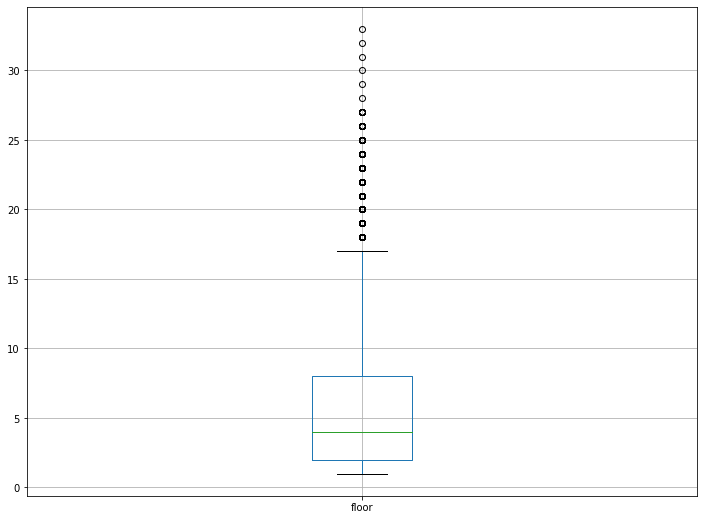

In [29]:
# общая проверка столбца
column_check('floor')

__Вывод по floor:__
- Этаж — целочисленное значение. Тип данных соответствует логике столбца. Изменения типа данных не требуется.
* Пропущенных значений нет.

### Столбец floors_total


Тип столбца floors_total: float64

--------------------

По столбцу floors_total пропущено 86 записей.
Это 0.4% от всех записей.

--------------------

Состав столбца floors_total:

1.0       25
2.0      383
3.0      668
4.0     1200
5.0     5788
6.0      914
7.0      592
8.0      390
9.0     3761
10.0    1174
11.0     203
12.0    1362
13.0     229
14.0     553
15.0     365
16.0    1376
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

--------------------

Описание столбца floors_total:

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

--------------------

Распределение столбца floor

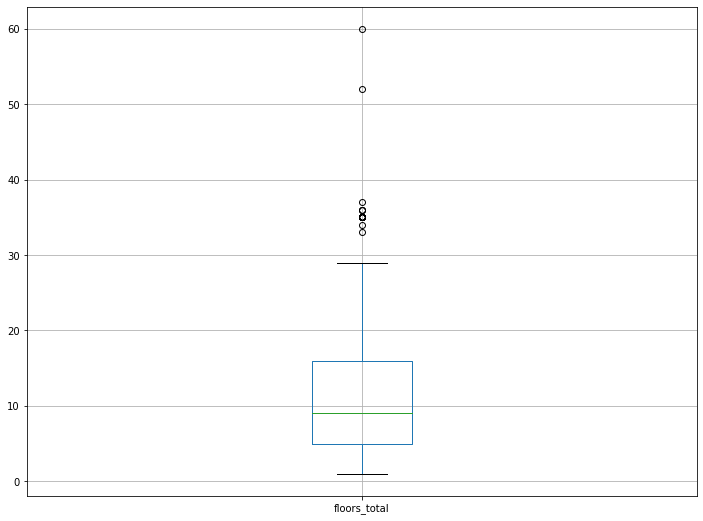

In [30]:
# общая проверка столбца
column_check('floors_total')

In [31]:
# проверка записей с пропущенными значениями
df_realty[df_realty.floors_total.isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


__Вывод по floors_total:__
- Количество этажей в доме должно быть целочисленным значением. Требуется преобразование данных.
- __Пропущенных значений — 0,4%.__ Возможные причины возникновения пропусков по столбцу — неполное заполнение данных при подаче объявления. 
- Заполнение не производиться, т.к. отстутствуют признаки, по которым можно произвести заполнение.
- Удаление пропусков не производится, т.к. по записям в иных столбцах есть информация, значимая для анализа по другим параметрам.

In [32]:
# перевод значений столбца в целочисленный вид
df_realty['floors_total'] = df_realty['floors_total'].astype(pd.Int64Dtype())

### Столбец ceiling_height


Тип столбца ceiling_height: float64

--------------------

По столбцу ceiling_height пропущено 9195 записей.
Это 38.8% от всех записей.

--------------------

Состав столбца ceiling_height:

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64

--------------------

Описание столбца ceiling_height:

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

--------------------

Распределение столбца ceiling_height:


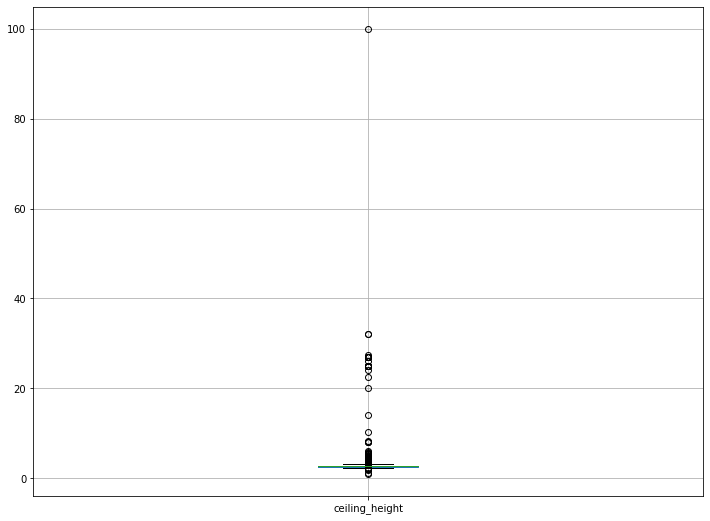

In [33]:
# общая проверка столбца
column_check('ceiling_height')

In [34]:
# проверка квартир с пропущенными значениями высоты потолка
df_realty[df_realty['ceiling_height'].isnull() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000,39.0,2017-12-16,1,NaN,9,20.0,6,NaN,False,False,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000,52.0,2018-07-19,2,NaN,5,31.0,2,NaN,False,False,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000,30.0,2017-07-07,1,NaN,5,17.5,4,NaN,False,False,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000,59.0,2018-01-15,3,NaN,5,38.0,4,NaN,False,False,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [35]:
# проверка квартир с экстремально низкой высотой потолка 
df_realty.sort_values(by='ceiling_height',ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
2572,4,2400000,62.0,2018-12-27,3,2.00,5,40.0,4,NaN,False,False,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19329,5,1700000,40.0,2018-07-15,2,2.00,9,NaN,8,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000,39.0,2017-12-16,1,NaN,9,20.0,6,NaN,False,False,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000,52.0,2018-07-19,2,NaN,5,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000,30.0,2017-07-07,1,NaN,5,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000,59.0,2018-01-15,3,NaN,5,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [36]:
# проверка квартир с высокими потолками
df_realty[df_realty['ceiling_height'].isnull() == False].sort_values(by='ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.00,5,14.0,5,True,False,False,11.00,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000,92.4,2019-04-05,2,32.00,6,55.5,5,False,False,False,16.50,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000,75.0,2018-11-12,3,32.00,3,53.0,2,NaN,False,False,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000,42.0,2017-04-18,1,27.50,24,37.7,19,False,False,False,11.00,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000,45.0,2017-07-18,1,27.00,4,22.0,2,NaN,False,False,10.00,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,11,2999000,33.5,2017-03-30,1,2.00,15,17.5,6,NaN,False,False,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
19098,7,2700000,56.0,2018-02-04,3,2.00,5,46.0,1,NaN,False,False,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0


In [37]:
# проверка квартир с высокими потолками на последних этажах
df_realty[(df_realty['ceiling_height'] > 3) & 
          (df_realty['floor'] == df_realty['floors_total'])].sort_values(by='ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.00,5,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
21824,20,2450000,44.0,2019-02-12,2,27.00,2,38.0,2,False,False,False,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22938,14,4000000,98.0,2018-03-15,4,27.00,2,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
6246,6,3300000,44.4,2019-03-25,2,25.00,5,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
20264,17,119000000,187.6,2017-07-10,4,6.00,7,147.0,7,NaN,False,False,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367,14,10500000,62.0,2017-01-13,2,3.05,6,32.7,6,NaN,False,False,13.6,0.0,Санкт-Петербург,11964.0,8464.0,1.0,287.0,3.0,144.0,161.0
14413,7,8000000,74.3,2017-09-20,3,3.04,5,46.4,5,NaN,False,False,9.2,NaN,Санкт-Петербург,21290.0,869.0,2.0,234.0,3.0,305.0,293.0
1980,6,14200000,126.3,2017-09-28,5,3.03,3,89.5,3,NaN,False,False,13.1,NaN,Санкт-Петербург,24397.0,3191.0,2.0,391.0,1.0,523.0,132.0
21539,16,8490000,59.6,2018-11-01,3,3.02,6,37.7,6,NaN,False,False,8.5,NaN,Санкт-Петербург,21727.0,4515.0,0.0,NaN,1.0,76.0,NaN


__Вывод по ceiling_height:__
* Тип данных соответствует логике столбца: высота потолка может быть дробным значением. Изменение типа данных не требуется.
* __Пропущенных значений — 39%__. Вероятная причина отсутствия данных — незаполнение графы при подаче объявления. 
- Пропущенные значения высоты потолка будут заполнены медианным в зависимости от этажа квартиры, т.к. эти данные есть для всех объявлений.
* __Присутствуют аномальные значения высоты потолка.__
    * Значения высоты потолка от 20,0 до 32,0 м можно интерпретировать как исправимую опечатку, например:
        * не 32 м, а 3,2;
        * не 27,5 м, а 2,75;
        * и т.д.
    * Значения высоты потолка около 2 м или наоборот высокие — мансарды последнего этажа.
    * Значения высоты потолка меньше роста человека или 100 м — неисправимая опечатка. __Игнорировать на этапе анализа.__

In [38]:
# уменьшение в 10 раз опечатки в высоте потолка от 20,0 до 32,0 м 
df_realty.loc[df_realty.query('ceiling_height >= 20 and ceiling_height <= 32').index, 'ceiling_height'] /= 10

In [39]:
# ввод порогового значения для исключения в расчёте медианы аномально низких высот потолка
# 2 метра выбраны как допустимый потолок для нахождения человека среднего роста в комнате
ceiling_height_threshold = 2

In [40]:
# расчёт медианных значений высоты потолка в зависимости от этажа квартиры
ceiling_height_mean_dict = (
    df_realty[(df_realty['ceiling_height'].isnull() == False) & 
              (df_realty['ceiling_height'] >= ceiling_height_threshold)]
    .pivot_table(index='floor', values='ceiling_height', aggfunc='median')
)

# переназначение индекса во временном датафрейме
#ceiling_height_mean_dict.reset_index().set_index('floors_total')

In [41]:
# заполнение пропущенных значений высоты потолка медианным в зависимости от этажа квартиры
df_realty['ceiling_height'] = df_realty['ceiling_height'].fillna(
    df_realty['floors_total'].map(ceiling_height_mean_dict['ceiling_height']))

### Столбец living_area


Тип столбца living_area: float64

--------------------

По столбцу living_area пропущено 1903 записей.
Это 8.0% от всех записей.

--------------------

Состав столбца living_area:

2.0      2
3.0      2
5.0      1
5.4      1
6.0      1
        ..
322.3    1
332.0    1
347.5    1
409.0    1
409.7    1
Name: living_area, Length: 1782, dtype: int64

--------------------

Описание столбца living_area:

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

--------------------

Распределение столбца living_area:


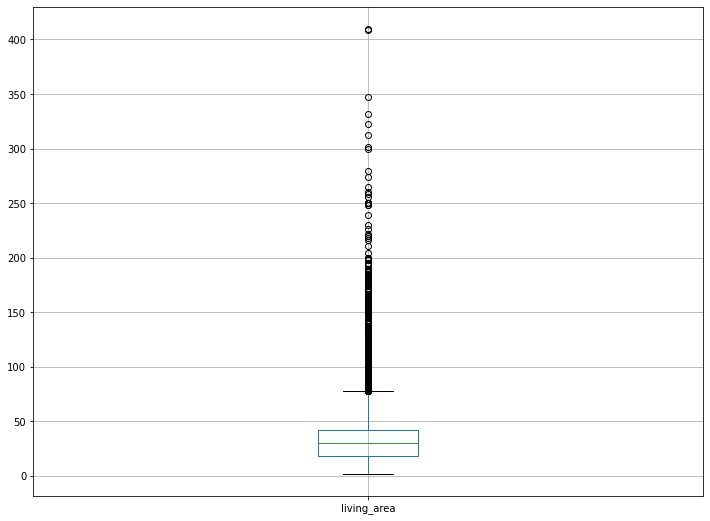

In [42]:
# общая проверка столбца
column_check('living_area')

In [43]:
# проверка квартир без указания жилой площади
df_realty[(df_realty['living_area'].isnull() == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24,3,2.70,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000,71.60,2019-04-18,2,2.75,24,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000,32.80,2018-02-19,1,2.60,9,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.00,2018-11-18,1,2.70,22,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000,88.00,2018-01-12,4,2.55,10,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000,45.60,2018-02-08,1,2.80,9,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000,35.00,2017-12-08,1,2.60,9,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [44]:
# проверка квартир с малой жилой площадью
df_realty.sort_values(by='living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21758,0,2330000,23.00,2018-01-01,0,2.75,24,2.0,22,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
13915,20,6350000,52.00,2018-02-06,2,3.00,6,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
23574,14,64990000,139.00,2015-11-24,3,3.00,8,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
3242,7,4440000,41.00,2017-07-02,1,2.70,17,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
17582,11,2680000,22.00,2018-08-11,0,2.70,25,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000,88.00,2018-01-12,4,2.55,10,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000,45.60,2018-02-08,1,2.80,9,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000,35.00,2017-12-08,1,2.60,9,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


__Вывод по living_area:__
- Жилая площадь может быть дробным значением. Изменение типа данных не требуется.
* __Пропущенных значений — 8%.__ Пропуски по столбцу могли возникнуть:
    - из-за некорректного заполнения данных в объявлении,
    - согласно плану БТИ, если квартира — студия или свободной планировки. 
- Заполнение производиться по средней доле жилой площади от общей площади.
- Удаление пропусков не производится, т.к. по записям в иных столбцах есть информация, значимая для анализа по другим параметрам.
* __Необходимо учесть при дальнейшем анализе__ аномально малые значения жилой площади.

In [45]:
# медианная жилая площадь недвижимости
living_area_median = df_realty['living_area'].median()
living_area_median

30.0

In [46]:
# медианная полная площадь недвижимости
total_area_median = df_realty['total_area'].median()
total_area_median

52.0

In [47]:
# медианная доля жилой площади
living_area_share = living_area_median / total_area_median
living_area_share

0.5769230769230769

In [48]:
# заполнение пропущенных значений жилой площади в зависимости от площади квартиры
df_realty['living_area'] = df_realty['living_area'].fillna(
    df_realty['total_area'] * living_area_share).round(2)

In [49]:
# расчёт средних значений жилой площади в зависимости от площади квартиры
#living_area_mean_dict = (
#    df[(df['living_area'].isnull() == False)]
#    .pivot_table(index='total_area', values='living_area', aggfunc='mean')
#)

# переназначение индекса во временном датафрейме
#living_area_mean_dict.reset_index().set_index('total_area')

# заполнение пропущенных значений жилой площади медианным в зависимости от полной площади
#df['living_area'] = df['living_area'].fillna(
#    df['total_area'].map(living_area_mean_dict['living_area']))

### Столбец is_apartment

In [50]:
# общая проверка столбца
column_check('is_apartment')


Тип столбца is_apartment: object

--------------------

По столбцу is_apartment пропущено 20924 записей.
Это 88.3% от всех записей.

--------------------

Состав столбца is_apartment:

False    2725
True       50
Name: is_apartment, dtype: int64

--------------------

Описание столбца is_apartment:

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

--------------------

Данные столбца "is_apartment" не подходят для построения графика boxplot.


__Вывод по is_apartment:__
* Тип данных соответствует логике столбца. Изменение типа данных не требуется.
* __Пропущенных значений — 88.3%__. Пропуски значений по столбцу могли возникнуть при ручном заполнения объявлений: если недвижимость не является апартаментами, то соответствующая метка не вносилась. 
- Незаполненные записи по столбцу is_apartment необходимо заполнить признаком "без апартаментов".

In [51]:
# заполнение пропущенных значений признака апартаментов
df_realty['is_apartment'] = df_realty['is_apartment'].fillna(False)

### Столбец studio

In [52]:
# общая проверка столбца
column_check('studio')


Тип столбца studio: bool

--------------------

По столбцу studio пропущено 0 записей.
Это 0.0% от всех записей.

--------------------

Состав столбца studio:

False    23550
True       149
Name: studio, dtype: int64

--------------------

Описание столбца studio:

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

--------------------

Данные столбца "studio" не подходят для построения графика boxplot.


__Вывод по studio:__
* Тип данных соответствует логике столбца. Изменение типа данных не требуется.
* Пропущенные значения отсутствуют.

### Столбец open_plan

In [53]:
# общая проверка столбца
column_check('open_plan')


Тип столбца open_plan: bool

--------------------

По столбцу open_plan пропущено 0 записей.
Это 0.0% от всех записей.

--------------------

Состав столбца open_plan:

False    23632
True        67
Name: open_plan, dtype: int64

--------------------

Описание столбца open_plan:

count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object

--------------------

Данные столбца "open_plan" не подходят для построения графика boxplot.


__Вывод по open_plan:__
* Тип данных соответствует логике столбца. Изменение типа данных не требуется.
* Пропущенные значения отсутствуют.

### Столбец kitchen_area


Тип столбца kitchen_area: float64

--------------------

По столбцу kitchen_area пропущено 2278 записей.
Это 9.6% от всех записей.

--------------------

Состав столбца kitchen_area:

1.30      1
2.00      7
2.30      1
2.40      1
2.89      1
         ..
93.20     1
100.00    1
100.70    1
107.00    1
112.00    1
Name: kitchen_area, Length: 971, dtype: int64

--------------------

Описание столбца kitchen_area:

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

--------------------

Распределение столбца kitchen_area:


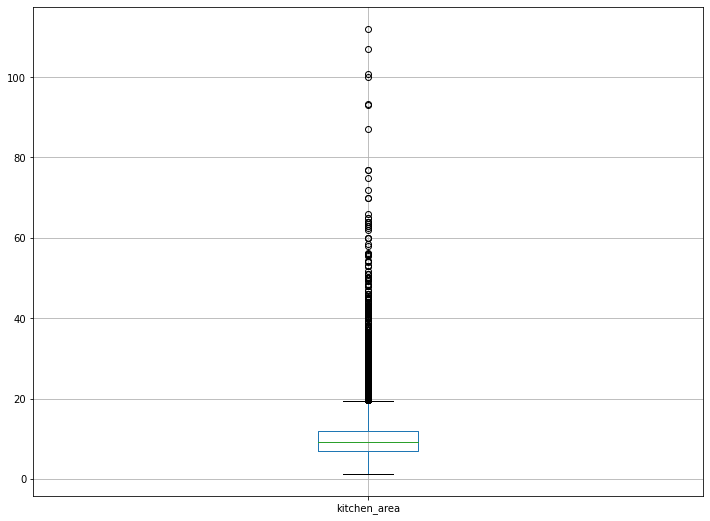

In [54]:
# общая проверка столбца
column_check('kitchen_area')

In [55]:
# количество квартир без указания площади кухни и со свободной планировкой
len(df_realty[(df_realty['kitchen_area'].isnull() == True) & 
              (df_realty['open_plan'] == True)])

67

In [56]:
# количество квартир без указания площади кухни и со статусом студия
len(df_realty[(df_realty['kitchen_area'].isnull() == True) &
              (df_realty['studio'] == True)])

149

In [57]:
# количество квартир без указания площади кухни и со статусом апартаменты
len(df_realty[(df_realty['kitchen_area'].isnull() == True) &
              (df_realty['is_apartment'] == True)])

15

__Вывод по kitchen_area:__
* Тип данных соответствует логике столбца: площадь кухни может быть дробным значением. Изменение типа данных не требуется.
* __Пропущенных значений — 9.6%.__ 
- Пропущенные значения площади кухни в студиях, апартаментах и квартирах со свободной планировкой составляют меньшую часть от всех пропущенных значений
- Заполнение производиться от полной площади по средней доли площади кухни.
- Удаление пропусков не производится, т.к. по записям в иных столбцах есть информация, значимая для анализа по другим параметрам.

In [58]:
# медианная площадь кухни 
kitchen_area_median = df_realty['kitchen_area'].median()
kitchen_area_median

9.1

In [59]:
# медианная доля кухни
kitchen_area_share = kitchen_area_median / total_area_median
kitchen_area_share

0.175

In [60]:
# заполнение пропущенных значений жилой площади в зависимости от площади квартиры
df_realty['kitchen_area'] = df_realty['kitchen_area'].fillna(
    df_realty['total_area'] * kitchen_area_share).round(2)

In [61]:
df_realty.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5474,8,1370000,31.0,2017-10-19,1,2.65,4,17.30,1,False,False,False,7.00,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,48.0
18645,15,32550000,84.0,2019-03-27,2,3.00,11,48.46,2,False,False,False,14.70,NaN,Санкт-Петербург,25754.0,5961.0,3.0,125.0,0.0,NaN,NaN
11900,1,3500000,61.8,2018-08-18,4,2.60,5,45.20,5,False,False,False,10.82,NaN,Ломоносов,47912.0,51337.0,0.0,NaN,1.0,819.0,147.0
21496,10,3950000,72.0,2017-12-16,2,2.65,6,41.54,4,False,False,False,12.60,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,38.0
18751,19,11500000,73.0,2019-01-11,2,3.25,5,40.00,3,False,False,False,11.00,1.0,Санкт-Петербург,24423.0,4675.0,1.0,697.0,0.0,NaN,4.0
21720,6,10140000,105.7,2017-06-29,4,3.50,4,69.90,4,False,False,False,9.20,NaN,Санкт-Петербург,21659.0,3854.0,1.0,645.0,1.0,838.0,249.0
19363,2,5300000,62.4,2018-07-15,2,2.60,8,35.10,5,False,False,False,10.90,2.0,посёлок Стрельна,28101.0,23290.0,2.0,700.0,2.0,859.0,261.0
14,1,4400000,36.0,2016-06-23,1,2.65,6,17.00,1,False,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
14971,14,5300000,53.8,2019-04-04,2,2.60,14,31.04,4,False,False,False,7.40,2.0,Санкт-Петербург,41433.0,11825.0,1.0,499.0,0.0,NaN,NaN
23590,0,21187872,123.3,2017-04-25,3,NaN,<NA>,50.40,18,False,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


### Столбец balcony


Тип столбца balcony: float64

--------------------

По столбцу balcony пропущено 11519 записей.
Это 48.6% от всех записей.

--------------------

Состав столбца balcony:

0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64

--------------------

Описание столбца balcony:

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

--------------------

Распределение столбца balcony:


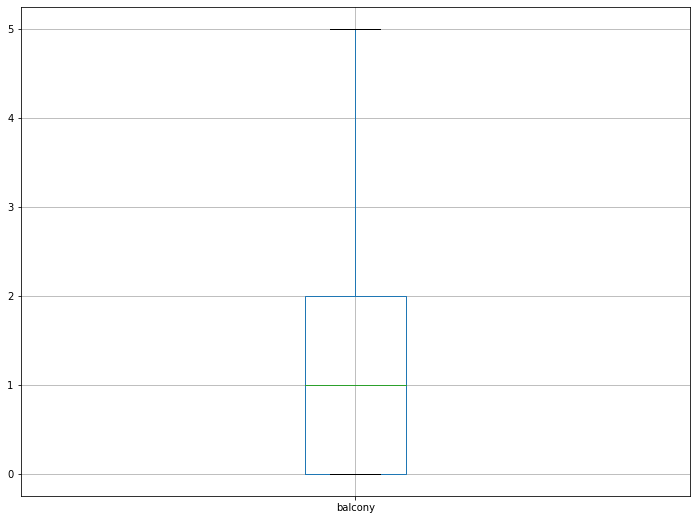

In [62]:
column_check('balcony')

In [63]:
# количество квартир без балконов
len(df_realty[(df_realty['balcony'].isnull() == True)])

11519

In [64]:
# количество квартир без балконов и на первом этаже
len(df_realty[(df_realty['balcony'].isnull() == True) &
              (df_realty['floor'] == 1)])

1926

In [65]:
# количество квартир без балконов и одноэтажным домом
len(df_realty[(df_realty['balcony'].isnull() == True) & 
              (df_realty['floors_total'] == 1)])

24

__Вывод по balcony:__
- Количество балконов должно быть целочисленным значением. Требуется преобразование типа данных.
* __Пропущенных значений — 48.6%.__ Пропущенные значения по столбцу балконы в квартирах на первом этаже и в одноэтажных домах составляют меньшую часть от всех пропущенных значений. Скорее всего пропущенные значения означают отсутствие балкона как такового и незаполнением графы при подаче объявления. 
- __Пропуски в столбце будут заполнены нулевыми значениями.__

In [66]:
# заполнение пропущенных значений признака апартаментов
df_realty['balcony'] = df_realty['balcony'].fillna(0)

In [67]:
# перевод значений столбца в целочисленный вид 
df_realty['balcony'] = df_realty['balcony'].astype(pd.Int64Dtype())

### Столбец locality_name

In [68]:
column_check('locality_name')


Тип столбца locality_name: object

--------------------

По столбцу locality_name пропущено 49 записей.
Это 0.2% от всех записей.

--------------------

Состав столбца locality_name:

Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 364, dtype: int64

--------------------

Описание столбца locality_name:

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

--------------------

Данные столбца "locality_name" не подходят для построения графика boxplot.


In [69]:
# проверка объявлений без указания названия населённого пункта
df_realty[(df_realty['locality_name'].isnull() == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.70,2016-04-15,3,3.55,5,50.80,2,False,False,False,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000,80.00,2017-05-30,3,2.65,4,42.60,2,False,False,False,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765,42.70,2015-09-20,1,2.75,24,15.60,3,False,False,False,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593,62.40,2015-10-11,2,2.75,24,33.10,21,False,False,False,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000,46.50,2016-05-28,2,2.60,5,30.80,5,False,False,False,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000,89.50,2014-12-09,2,3.00,8,39.62,7,False,False,False,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000,80.00,2015-12-10,3,4.00,4,52.30,3,False,False,False,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000,83.00,2015-08-14,3,2.64,7,47.88,6,False,False,False,14.52,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000,85.50,2016-01-20,3,2.64,7,59.10,5,False,False,False,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000,30.00,2016-04-29,1,2.75,24,20.00,23,False,False,False,5.25,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


__Вывод по locality_name:__
* Тип данных соответствует логике столбца. Изменение типа данных не требуется.
* Названия одних и тех же населенных пунктов различаются. __Требуется категоризация.__
* __Пропущенных значений — 0.2%.__ Подать объявление в Яндекс.Недвижимости невозможно, поэтому причина пропусков в выгрузке — техническая.
    * Сообщить по компетенции о возникшей проблеме с пропуском названия населённого пункта.
    * Удалить пропущенные значения, так как информация критическая для анализа и её восстановить невозможно в разумные сроки.

In [70]:
df_realty[df_realty.locality_name.isnull()].index

Int64Index([ 1097,  2033,  2603,  2632,  3574,  4151,  4189,  4670,  5343,
             5707,  6765,  7114,  7330,  7600,  8568,  8986,  9821, 10122,
            11248, 12879, 12936, 13223, 13690, 14273, 14342, 15686, 15866,
            16499, 16561, 16610, 17535, 17764, 18526, 18917, 19045, 19972,
            20057, 20382, 20590, 20654, 21119, 21276, 21333, 21715, 21898,
            22474, 22717, 22933, 23214],
           dtype='int64')

In [71]:
# добавление данных без указания населенного пункта для дальнейшей проверки
indexes_to_check = add_to_df(
    df_realty[df_realty.locality_name.isnull()].index,
    'сбой заполнения названия населённого пункта',
    indexes_to_check)

In [72]:
# удаление записей с пропущенными значениями названий населенных пунктов
df_realty = df_realty.dropna(subset=['locality_name'])

#### Категоризация населенных пунктов

In [73]:
# выборка уникальных указанных названий населенных пунктов
locality_name_dict_temp = df_realty['locality_name'].dropna().unique()

In [74]:
# создание пустого словаря названий населенных пунктов
locality_name_dict = []

# выборка непосредственно названий населенных пунктов из указанной информации по заглавным буквам
for loc_name in locality_name_dict_temp:
    # создание пустого временного массива
    temp = ''
    # разделение наименования населенного пункта на слова
    loc_name_split = loc_name.split()
    # перебор слов
    for loc_name_temp in loc_name_split:
        # проверка начала слова на заглавную букву
        if loc_name_temp[0].isupper() == True:
            # объединение полного название с заглавными буквами 
            temp = temp + loc_name_temp + ' '        
    # удаление последнего пробела в наименовании и добавление в словарь 
    locality_name_dict.append(temp.rstrip())

In [75]:
# исключение дубликатов словаря населенных пунктов
locality_name_dict = list(dict.fromkeys(locality_name_dict))

In [76]:
# создание функции определения названий населенных пунктов
def real_locality_name(locality_name):
    for locality_name_temp in locality_name_dict:
        try:
            if locality_name.find(locality_name_temp) >= 0:
                return locality_name_temp
        except:
                return 'Ошибка'

In [77]:
# создание столбца с реальными названиями населенных пунктов
df_realty['real_locality_name'] = df_realty['locality_name'].apply(real_locality_name)

In [78]:
# проверка объявлений без указания добавленного реального названия населённого пункта
df_realty[(df_realty['real_locality_name'].isnull() == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_locality_name


## Данные, полученные автоматически на основе картографических данных

При подаче объявлений в Яндекс.Недвижимости ввод в ручном режиме  расстояния до ближайшего аэропорта, центра, пруда, парка и т.д. не предполагается, т.е. данные в столбцах __airports_nearest__, __cityCenters_nearest__, __parks_around3000__, __parks_nearest__, __ponds_around3000__, __ponds_nearest__ получены автоматически на основе картографических данных.

In [79]:
# выборка столбцов с автоматическим заполнением
auto_columns = df_realty.columns[15:21]

In [80]:
auto_columns

Index(['airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest'],
      dtype='object')

In [81]:
# проверка автоматического заполнения столбцов
for i in auto_columns:

    # пропуски по столбцу по СПб
    spb_missed = len(df_realty[(df_realty[i].isnull() == True) & 
                               (df_realty['real_locality_name'] == 'Санкт-Петербург')])

    # все пропуски по столбцу
    all_missed = len(df_realty[(df_realty[i].isnull() == True)])
    
    # вывод информации
    print('Столбец ' + i)
    print('Пропуски в столбце {} по СПб: {}'.format(i, spb_missed))
    print('Пропуски в столбце {} по всем городам: {}'.format(i, all_missed))
    print('Доля пропусков по СПб: {:0.1%}'.format(spb_missed/all_missed))
    print()

Столбец airports_nearest
Пропуски в столбце airports_nearest по СПб: 85
Пропуски в столбце airports_nearest по всем городам: 5534
Доля пропусков по СПб: 1.5%

Столбец cityCenters_nearest
Пропуски в столбце cityCenters_nearest по СПб: 61
Пропуски в столбце cityCenters_nearest по всем городам: 5511
Доля пропусков по СПб: 1.1%

Столбец parks_around3000
Пропуски в столбце parks_around3000 по СПб: 61
Пропуски в столбце parks_around3000 по всем городам: 5510
Доля пропусков по СПб: 1.1%

Столбец parks_nearest
Пропуски в столбце parks_nearest по СПб: 8437
Пропуски в столбце parks_nearest по всем городам: 15586
Доля пропусков по СПб: 54.1%

Столбец ponds_around3000
Пропуски в столбце ponds_around3000 по СПб: 61
Пропуски в столбце ponds_around3000 по всем городам: 5510
Доля пропусков по СПб: 1.1%

Столбец ponds_nearest
Пропуски в столбце ponds_nearest по СПб: 7738
Пропуски в столбце ponds_nearest по всем городам: 14565
Доля пропусков по СПб: 53.1%



In [82]:
# проверка количества парков и расстояния до ближайшего парка
len(df_realty[(df_realty['parks_around3000'] != 0) & (df_realty.parks_nearest.isna())])

5510

In [83]:
# создание и заполнение датафрейма для дальнейшей проверки автозаполнения данных на основе картографических данных
bad_automation_check = df_realty[
    (df_realty.airports_nearest.isna()) & \
    (df_realty.cityCenters_nearest.isna()) & \
    (df_realty.parks_around3000.isna()) & \
    (df_realty.ponds_around3000.isna())
].copy()

In [84]:
bad_automation_check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_locality_name
5,10,2890000,30.40,2018-09-10,1,2.70,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000,33.16,2018-05-23,1,2.60,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
12,10,3890000,54.00,2016-06-30,2,2.60,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Кудрово
30,12,2200000,32.80,2018-02-19,1,2.60,9,18.92,2,False,False,False,5.74,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000,62.80,2018-09-18,4,2.50,5,45.50,3,False,False,False,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Дзержинского
23692,2,1350000,30.00,2017-07-07,1,2.60,5,17.50,4,False,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,Тихвин
23695,14,3100000,59.00,2018-01-15,3,2.60,5,38.00,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,9.92,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Рождествено


In [85]:
# проверка населённых пунктов по корректности автозаполнения
bad_automation_check.groupby(by='real_locality_name')['real_locality_name'].count().sort_values(ascending = False).head(15)

real_locality_name
Мурино             588
Кудрово            472
Всеволожск         398
Гатчина            307
Выборг             237
Новое Девяткино    144
Сертолово          142
Кириши             125
Бугры              114
Сланцы             112
Волхов             111
Кингисепп          106
Тосно              104
Никольское          94
Коммунар            90
Name: real_locality_name, dtype: int64

__Промежуточный вывод по данным, полученным автоматически на основе картографических данных:__
* Данные заполняются автоматически прежде всего для СПб, районов СПб и крупных городов. При этом пропуски автоматического заполнения встречаются и по СПб, и по другим крупным городам: Выборг, Гатчина.
* Судя по выборке, автоматическое заполнение корректно работает для СПб и его районов, а не для иных городов.
* Повышенный процент пропущенных значений (расстояния до ближайшего пруда / парка) по столбцам __ponds_nearest__ и __parks_nearest__ относительно других столбцов может означать отсутствие парков и прудов в радиусе 3000 м. Эту гипотезу подтверждает меньший процент пропущенных значений в соответствуюших столбцах с количеством объектов __ponds_around3000__ и __parks_around3000__.
* __Необходима техническая проверка по компетенции сбоев автоматического заполенния данных.__

### Столбец airports_nearest


Тип столбца airports_nearest: float64

--------------------

По столбцу airports_nearest пропущено 5534 записей.
Это 23.4% от всех записей.

--------------------

Состав столбца airports_nearest:

0.0        1
6450.0     2
6914.0     1
6949.0     1
6989.0     6
          ..
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, Length: 8257, dtype: int64

--------------------

Описание столбца airports_nearest:

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

--------------------

Распределение столбца airports_nearest:


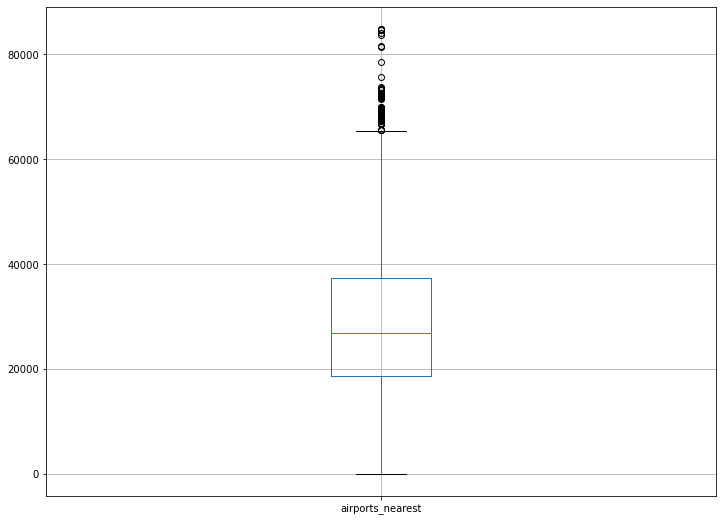

In [86]:
# общая проверка столбца
column_check('airports_nearest')

__Промежуточный вывод по airports_nearest:__
* Тип данных __не соответствует__ логике столбца: расстояние в метрах не предполагает детализации до сантиметров, поэтому необходимо перевести в целочисленное значение.
* __Пропущенных значений — 23.4%__. 
* В рамках данного исследования заполнение столбца airports_nearest на основании реальных данных — трудозатратная задача. Принято решение о заполнении пропусков особой отметкой __"-999"__.

In [87]:
# заполнение пропущенных значений по столбцу
df_realty['airports_nearest'] = df_realty['airports_nearest'].fillna(-999)

In [88]:
# перевод значений столбца в целочисленный вид 
df_realty['airports_nearest'] = df_realty['airports_nearest'].astype(pd.Int64Dtype())

### Столбец cityCenters_nearest


Тип столбца cityCenters_nearest: float64

--------------------

По столбцу cityCenters_nearest пропущено 5511 записей.
Это 23.3% от всех записей.

--------------------

Состав столбца cityCenters_nearest:

181.0      1
208.0      1
215.0      1
287.0      1
291.0      1
          ..
64857.0    1
65105.0    1
65764.0    1
65952.0    1
65968.0    1
Name: cityCenters_nearest, Length: 7627, dtype: int64

--------------------

Описание столбца cityCenters_nearest:

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

--------------------

Распределение столбца cityCenters_nearest:


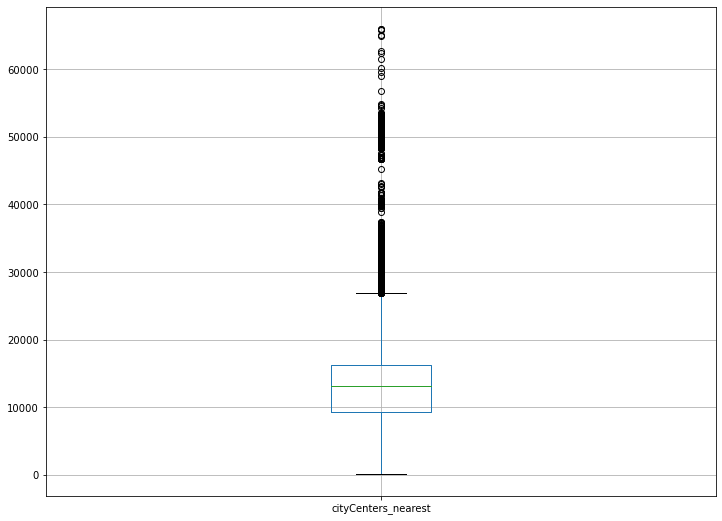

In [89]:
# общая проверка столбца
column_check('cityCenters_nearest')

__Промежуточный вывод по cityCenters_nearest:__
* Тип данных __не соответствует__ логике столбца: расстояние в метрах не предполагает детализации до сантиметров, поэтому необходимо перевести в целочисленное значение.
* __Пропущенных значений — 23.3%.__
* В рамках данного исследования заполнение столбца cityCenters_nearest на основании реальных данных — трудозатратная задача. Принято решение о заполнении пропусков особой отметкой __"-999"__.

In [90]:
# заполнение пропущенных значений по столбцу
df_realty['cityCenters_nearest'] = df_realty['cityCenters_nearest'].fillna(-999)

In [91]:
df_realty['cityCenters_nearest_km'] = (df_realty['cityCenters_nearest'] / 1000).round(0).astype(pd.Int64Dtype())

In [92]:
# перевод значений столбца в целочисленный вид 
df_realty['cityCenters_nearest'] = df_realty['cityCenters_nearest'].astype(pd.Int64Dtype())

### Столбец parks_around3000


Тип столбца parks_around3000: float64

--------------------

По столбцу parks_around3000 пропущено 5510 записей.
Это 23.3% от всех записей.

--------------------

Состав столбца parks_around3000:

0.0    10080
1.0     5671
2.0     1744
3.0      645
Name: parks_around3000, dtype: int64

--------------------

Описание столбца parks_around3000:

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

--------------------

Распределение столбца parks_around3000:


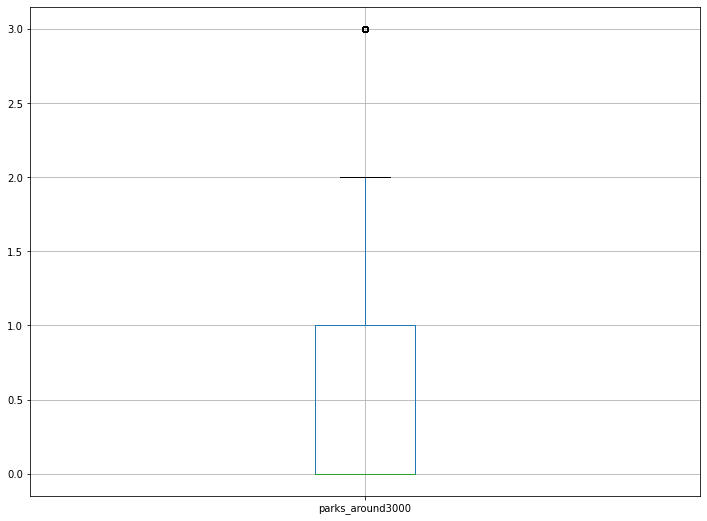

In [93]:
# общая проверка столбца
column_check('parks_around3000')

__Промежуточный вывод по parks_around3000:__
* Тип данных __не соответствует__ логике столбца: количество парков должно быть целочисленным значением.
* __Пропущенных значений — 23.3%__. 
* Принято решение о заполнении пропусков по столбцу parks_around3000 __нулевым значением__.

In [94]:
# заполнение пропущенных значений по столбцу
df_realty['parks_around3000'] = df_realty['parks_around3000'].fillna(0)

In [95]:
# перевод значений столбца в целочисленный вид 
df_realty['parks_around3000'] = df_realty['parks_around3000'].astype(pd.Int64Dtype())

### Столбец parks_nearest


Тип столбца parks_nearest: float64

--------------------

По столбцу parks_nearest пропущено 15586 записей.
Это 65.9% от всех записей.

--------------------

Состав столбца parks_nearest:

1.0       1
3.0       1
4.0       1
7.0       1
9.0       2
         ..
2905.0    1
2984.0    1
3013.0    1
3064.0    1
3190.0    2
Name: parks_nearest, Length: 994, dtype: int64

--------------------

Описание столбца parks_nearest:

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

--------------------

Распределение столбца parks_nearest:


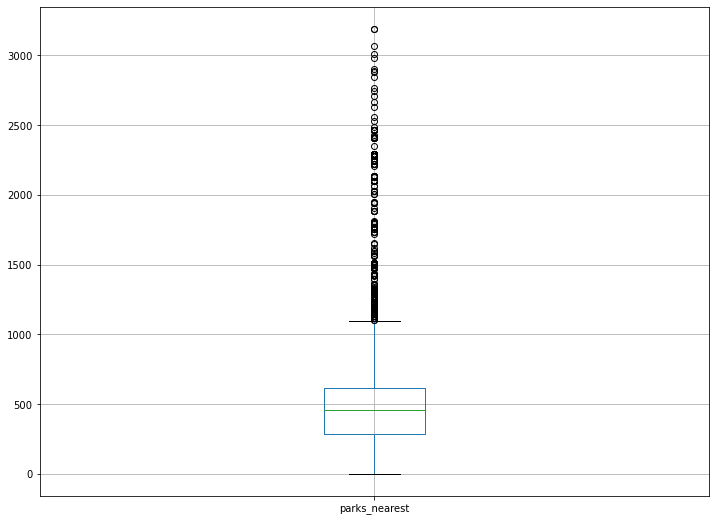

In [96]:
# общая проверка столбца
column_check('parks_nearest')

__Промежуточный вывод по parks_nearest:__
* Тип данных __не соответствует__ логике столбца: расстояние в метрах не предполагает детализации до сантиметров, поэтому необходимо перевести в целочисленное значение.
* __Пропущенных значений — 65.9%__.
* Необходима техническая проверка по компетенции сбоев автоматического заполенния данных.
* Принято решение о заполнении пропусков по столбцу parks_nearest особой отметкой "-999".

In [97]:
# заполнение пропущенных значений по столбцу
df_realty['parks_nearest'] = df_realty['parks_nearest'].fillna(-999)

In [98]:
# перевод значений столбца в целочисленный вид 
df_realty['parks_nearest'] = df_realty['parks_nearest'].astype(pd.Int64Dtype())

### Столбец ponds_around3000


Тип столбца ponds_around3000: float64

--------------------

По столбцу ponds_around3000 пропущено 5510 записей.
Это 23.3% от всех записей.

--------------------

Состав столбца ponds_around3000:

0.0    9055
1.0    5702
2.0    1889
3.0    1494
Name: ponds_around3000, dtype: int64

--------------------

Описание столбца ponds_around3000:

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

--------------------

Распределение столбца ponds_around3000:


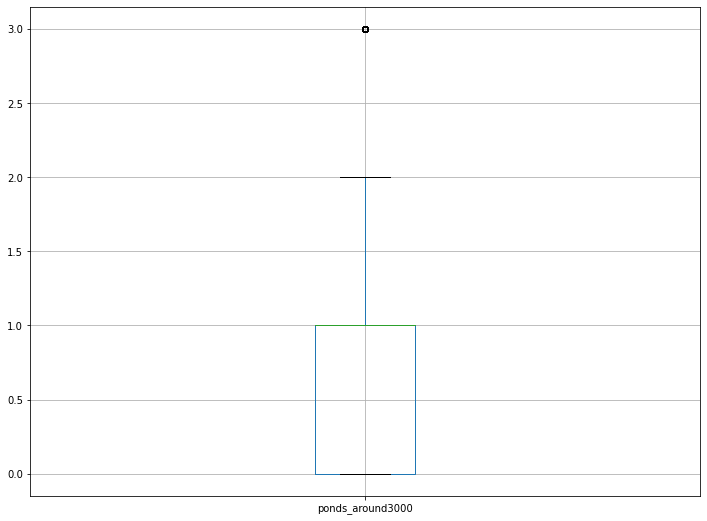

In [99]:
# общая проверка столбца
column_check('ponds_around3000')

__Промежуточный вывод по ponds_around3000:__
* Тип данных __не соответствует__ логике столбца: количество прудов должно быть целочисленным значением.
* __Пропущенных значений — 23.3%__. Пропущенные значения могут означать отсутствие прудов в радиусе 3000 м. 
* Принято решение о заполнении пропущенных значений по столбцу нулями.

In [100]:
# заполнение пропущенных значений по столбцу
df_realty['ponds_around3000'] = df_realty['ponds_around3000'].fillna(0)

In [101]:
# перевод значений столбца в целочисленный вид 
df_realty['ponds_around3000'] = df_realty['ponds_around3000'].astype(pd.Int64Dtype())

### Столбец ponds_nearest


Тип столбца ponds_nearest: float64

--------------------

По столбцу ponds_nearest пропущено 14565 записей.
Это 61.6% от всех записей.

--------------------

Состав столбца ponds_nearest:

13.0      2
16.0      8
19.0      4
20.0      5
22.0      7
         ..
1299.0    1
1313.0    1
1337.0    1
1341.0    2
1344.0    1
Name: ponds_nearest, Length: 1096, dtype: int64

--------------------

Описание столбца ponds_nearest:

count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

--------------------

Распределение столбца ponds_nearest:


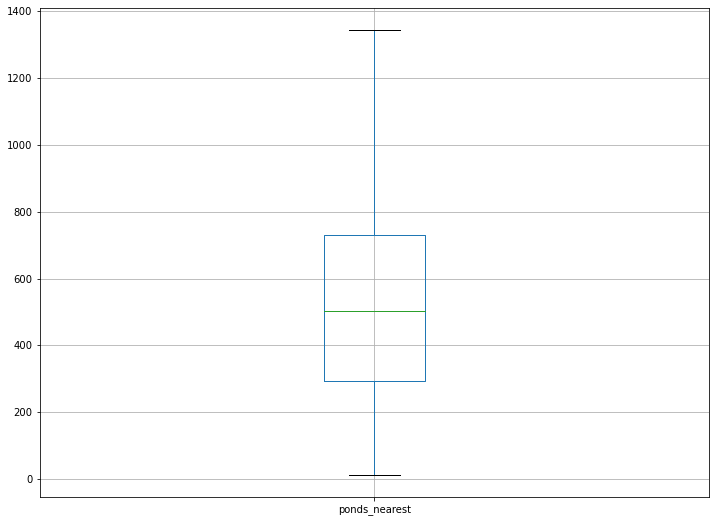

In [102]:
# общая проверка столбца
column_check('ponds_nearest')

__Промежуточный вывод по ponds_nearest:__
* Тип данных __не соответствует__ логике столбца: расстояние в метрах не предполагает детализации до сантиметров, поэтому необходимо перевести в целочисленное значение.
* __Пропущенных значений — 61.6%__. Пропущенные значения могут означать отсутствие прудов в радиусе 3000 м.
* Принято решение о заполнении пропусков по столбцу ponds_nearest особой отметкой "-999".

In [103]:
# заполнение пропущенных значений по столбцу
df_realty['ponds_nearest'] = df_realty['ponds_nearest'].fillna(-999)

In [104]:
# перевод значений столбца в целочисленный вид 
df_realty['ponds_nearest'] = df_realty['ponds_nearest'].astype(pd.Int64Dtype())

### Столбец days_exposition


Тип столбца days_exposition: float64

--------------------

По столбцу days_exposition пропущено 3180 записей.
Это 13.4% от всех записей.

--------------------

Состав столбца days_exposition:

1.0         1
2.0         3
3.0       158
4.0       174
5.0       152
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: days_exposition, Length: 1141, dtype: int64

--------------------

Описание столбца days_exposition:

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

--------------------

Распределение столбца days_exposition:


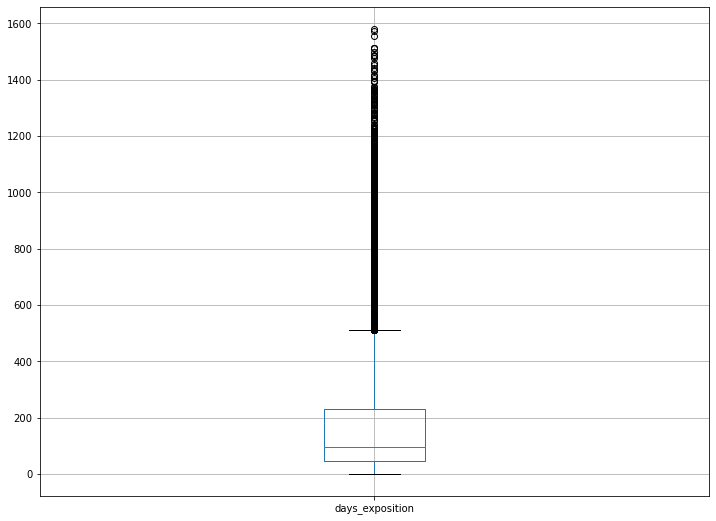

In [105]:
# общая проверка столбца
column_check('days_exposition')

__Промежуточный вывод по days_exposition:__
* Тип данных __не соответствует__ логике столбца: количество дней должно быть целочисленным значением.
* __Пропущенных значений — 13.4%__. Пропущенные значения могут означать, что объявление всё еще активно. __Заполнение пропусков не требуется.__

In [106]:
# перевод значений столбца в целочисленный вид 
# поэтапный перевод через float реализован, т.к. прямой перевод в int64 выдаёт ошибку nansafe)
df_realty['days_exposition'] = df_realty['days_exposition'].astype('float32').astype(pd.Int64Dtype())

In [107]:
# итоговая проверка преобразования типов данных
df_realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23650 non-null  int64         
 1   last_price              23650 non-null  int64         
 2   total_area              23650 non-null  float64       
 3   first_day_exposition    23650 non-null  datetime64[ns]
 4   rooms                   23650 non-null  int64         
 5   ceiling_height          23544 non-null  float64       
 6   floors_total            23565 non-null  Int64         
 7   living_area             23650 non-null  float64       
 8   floor                   23650 non-null  int64         
 9   is_apartment            23650 non-null  bool          
 10  studio                  23650 non-null  bool          
 11  open_plan               23650 non-null  bool          
 12  kitchen_area            23650 non-null  float6

In [108]:
# размер массива после преобразований
processed_data_len = len(df_realty)

In [109]:
# уменьшение массива данных 
print('Из массива удалено {} строк.'.format(raw_data_len-processed_data_len))
print('Массив данных сократился на {:.1%}.'.format(1-processed_data_len/raw_data_len))

Из массива удалено 49 строк.
Массив данных сократился на 0.2%.


### Вывод
- В датафрейме отсутствуют дубликаты данных.
- Основные параметры, по которым отсутствуют пропуски (и судя по всему по ним в первую очередь формировалась выгрузка): last_price, total_area, first_day_exposition. При этом, по одному из важных параметров для анализа — наименование населенного пункта (locality_name) присутствуют пропуски, что необходимо проверить дополнительно.
- Типы данных в выгрузке не всегда соответствует логике столбцов и потребовалось преобразование в иные типы данных. 
- При подаче объявлений возникают ошибки ручного заполнения данных. Часть опечаток скорректирована, часть оставлена "как есть" для исключения на этапе анализа. Доля удалённых записей - 0.2% (49 строк ).
- Количество пропусков в столбцах parks_around3000, ponds_around3000 и в соответсвующих записых столбцов parks_nearest, ponds_nearest одинаковое — 5510. Можно говорить о системных ограничениях или технической ошибки автоматического заполнения.
- Подготовлены массивы данных с указанием индекса и причины для дальнейших проверок:
    -  __indexes_to_check__ — общая техническая проверка;
    - __bad_automation_check__ — проверка автоматического заполнения на основе картографических данных.

In [110]:
# стоимость квадратного метра объявления
df_realty['sq_meter_price'] = df_realty['last_price'] / df_realty['total_area']

In [111]:
# добавление столбцов: день недели, месяц и год публикации объявления
df_realty['weekday'] = df_realty['first_day_exposition'].dt.weekday
df_realty['month'] = df_realty['first_day_exposition'].dt.month
df_realty['year'] = df_realty['first_day_exposition'].dt.year

In [112]:
df_realty.floors_total.isna().sum()


85

In [113]:
# создание функции добавления информации об этаже
#def floor_group(floor, floors_total):
#    if floor == 1:
#        return 'первый'
#    elif floor == floors_total:
#        return 'последний'
#    elif floors_total == 1:
#        return 'одноэтажный дом'
#    else:
#        return 'другой'

# добавление информации об этаже в таблицу
#df_realty['floor_group'] = df_realty.apply(lambda x: floor_group(x.floor, x.floors_total), axis=1)

__Альтернативная разбивка по этажам:__ целесообразно пересмотреть принцип разбивки этажей в случае принятитя ФОИВами СПб или Лен. области (или иного другого региона) правил установления нормативов на отопление и горячую воду в зависимости от этажа (например:, 1-4, 5-8, 9+), так как это будет влиять на будущие платежи за ЖКХ и привлекательность объявления.

In [114]:
# расчёт соотношения жилой к общей площади
df_realty['living_area_%'] = df_realty['living_area'] / df_realty['total_area']

In [115]:
# расчёт соотношения площади кухни к общей площади
df_realty['kitchen_area_%'] = df_realty['kitchen_area'] / df_realty['total_area']

### Вывод
- В датафрейм добавлены данные, согласно заданию:
    - цена квадратного метра;
    - день недели, месяц и год публикации объявления;
    - этаж квартиры (в список возможных вариантов признака этажа (первый, последний, другой) добавлена категория "одноэтажный дом");
    - соотношение жилой и общей площади;
    - также отношение площади кухни к общей.

## Исследовательский анализ данных
<a id = "eda"></a>
[В оглавление](#index)

### Изучение параметров. Построение гистограмм

Параметры к изучению:
- цена,
- площадь, 
- число комнат, 
- высота потолков,
- время продажи квартиры.

In [116]:
# датафрейм параметров к изучению: площадь, цена, число комнат, высота потолков
parameters_to_check = [['last_price', 'Цена на момент снятия с публикации', 'руб.'],
                    ['total_area', 'Площадь квартиры в квадратных метрах', 'м²'],
                    ['rooms', 'Число комнат', 'шт.'],
                    ['ceiling_height', 'Высота потолков', 'м'],
                    ['days_exposition','Время продажи квартиры', 'дни']
                   ]

Гистограммы по сырым данным



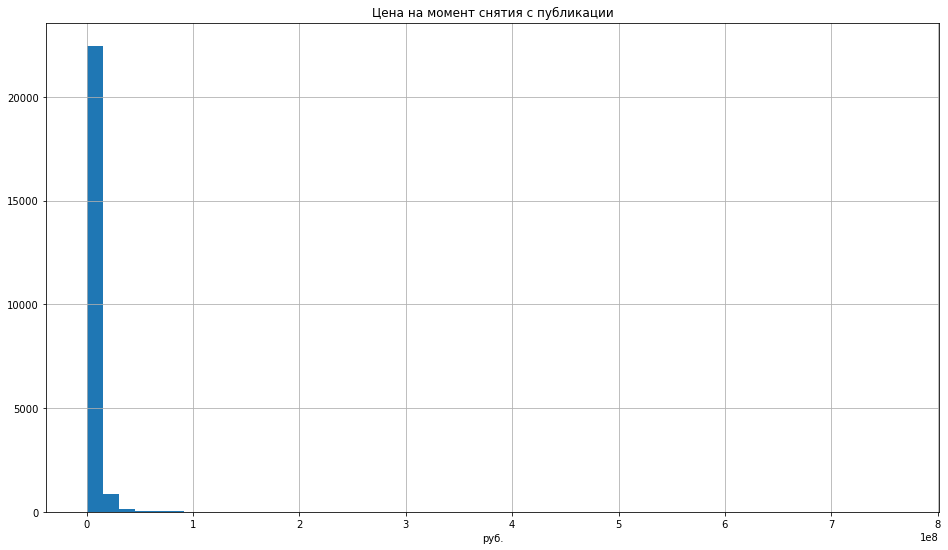

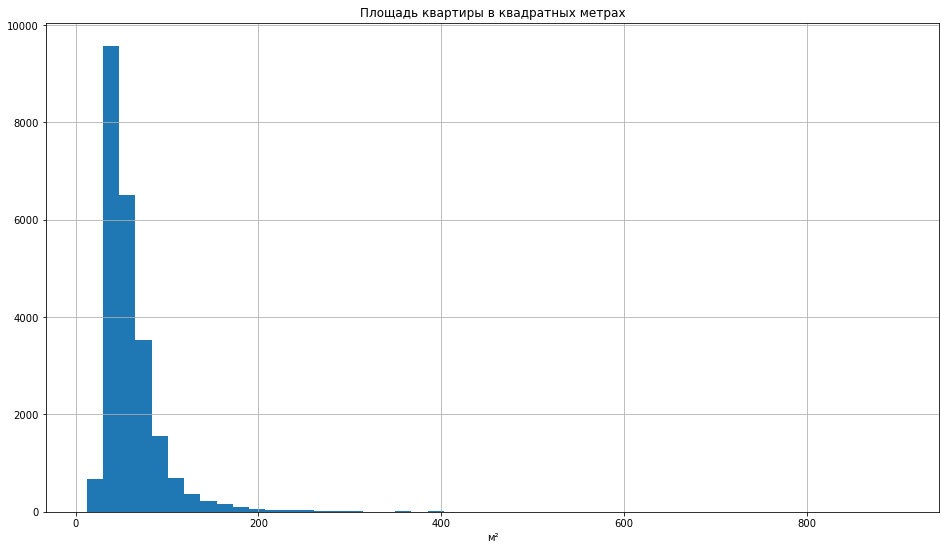

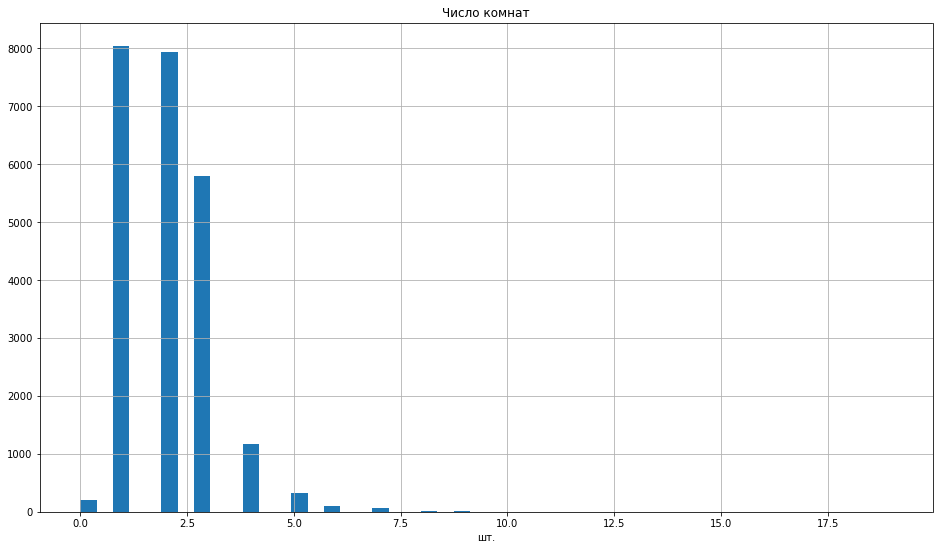

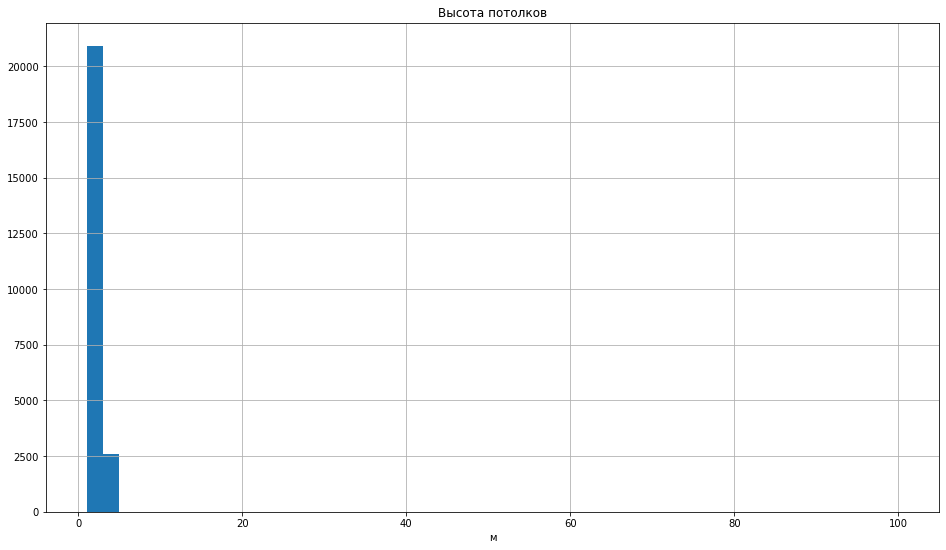

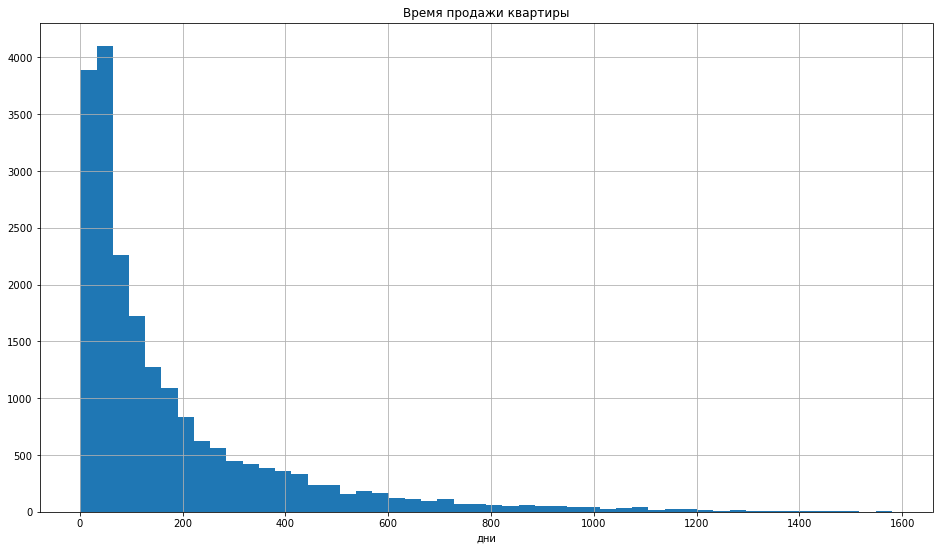

In [117]:
# Построение гистограммы для каждого параметра
print('Гистограммы по сырым данным')
print()
for parameter in parameters_to_check:
    df_realty.hist(column=parameter[0], bins=50)
    plt.title(parameter[1])
    plt.xlabel(parameter[2])

Гистограммы без редких и выбивающихся значений



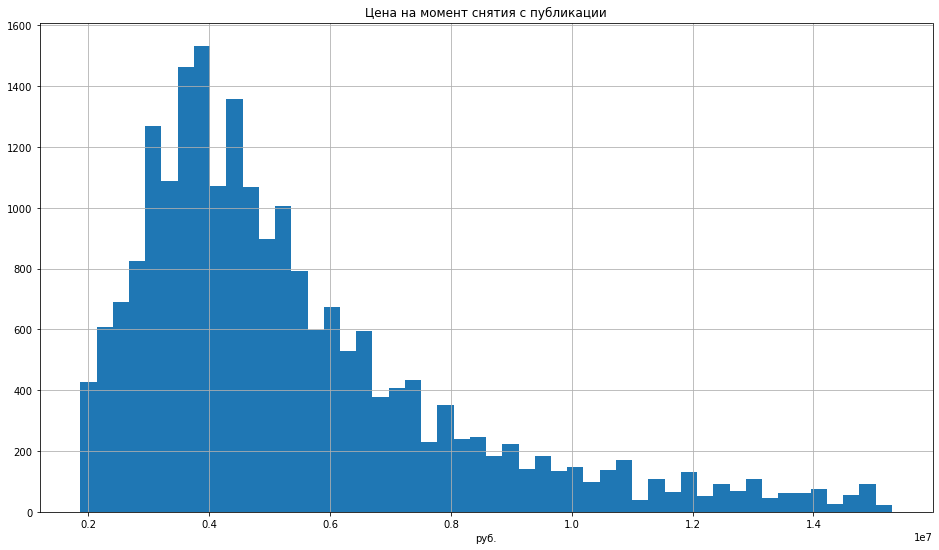

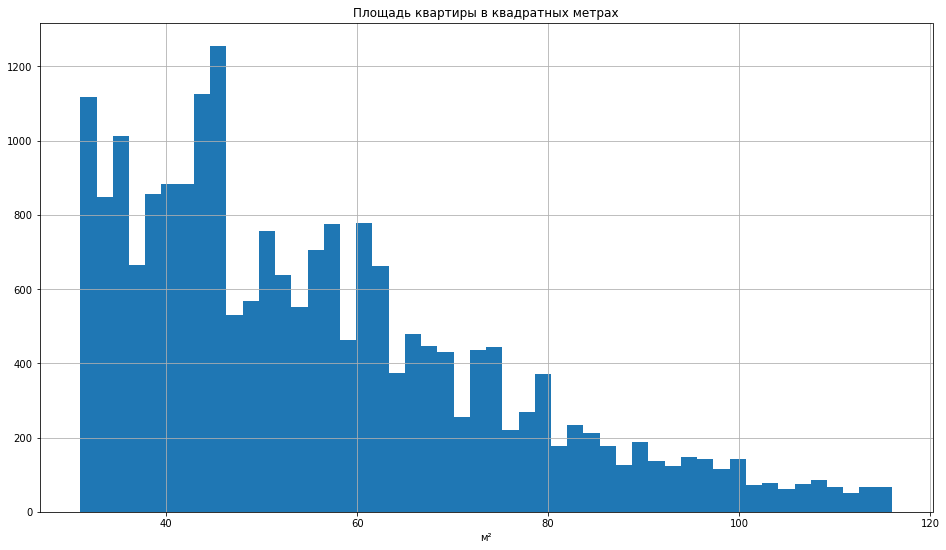

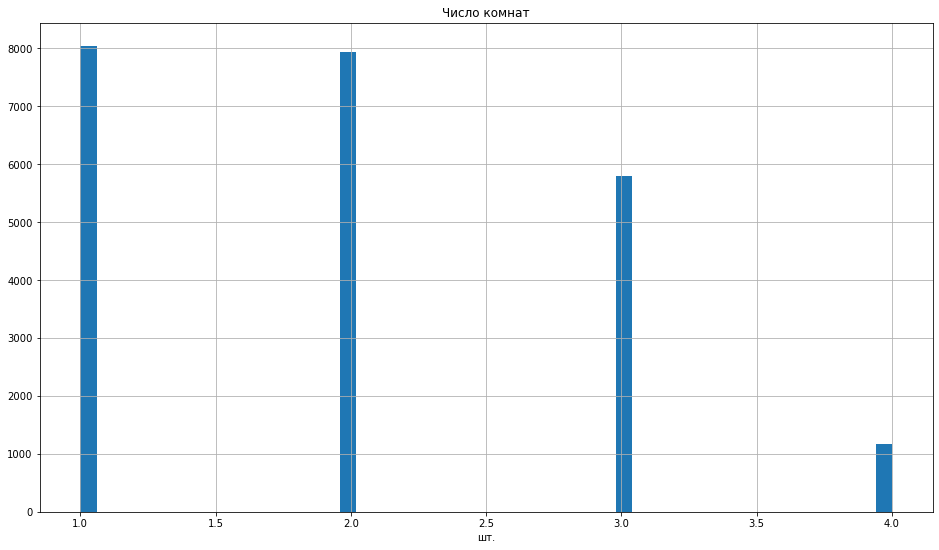

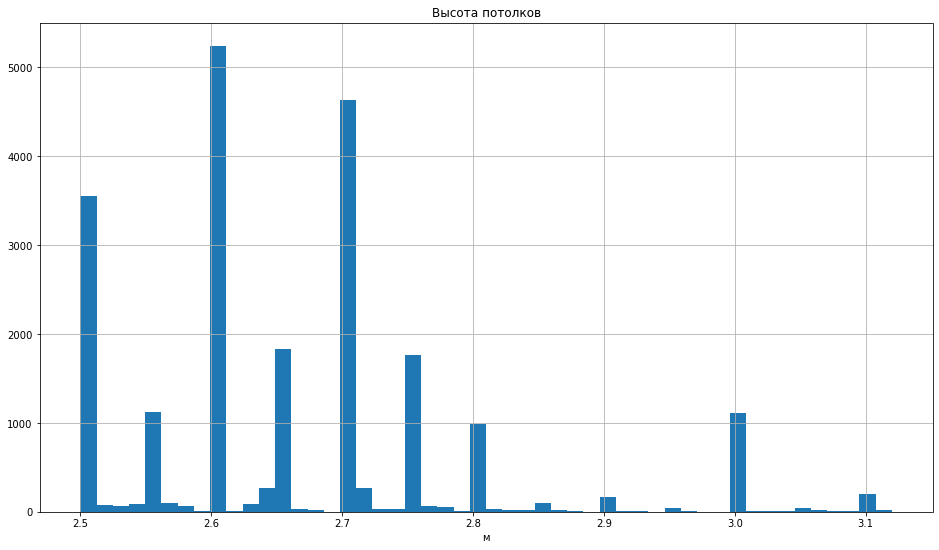

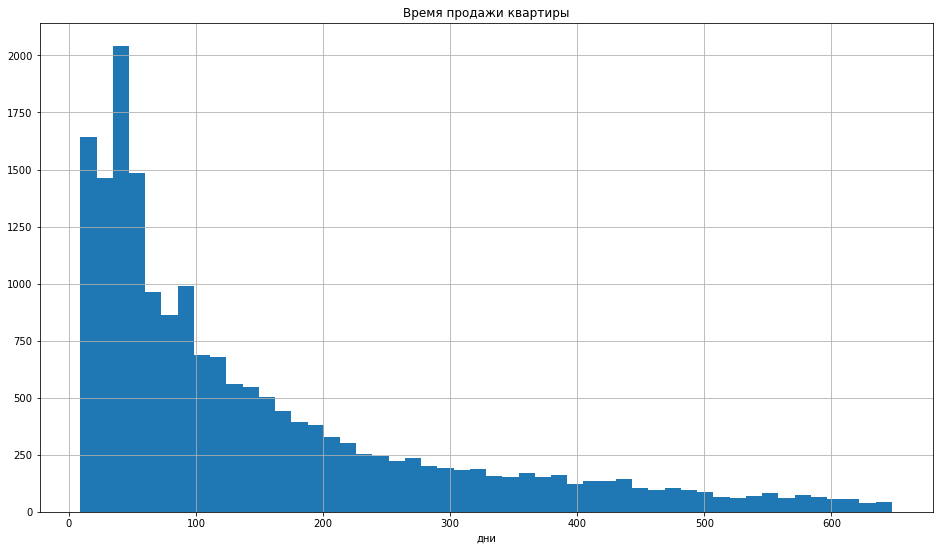

In [118]:
# Построение гистограммы для каждого параметра
print('Гистограммы без редких и выбивающихся значений')
print()
for parameter in parameters_to_check:
    hist_min = df_realty[parameter[0]].quantile(0.05)
    hist_max = df_realty[parameter[0]].quantile(0.95)
    df_realty.hist(column=parameter[0], bins=50, range = (hist_min, hist_max))
    plt.title(parameter[1])
    plt.xlabel(parameter[2])

In [119]:
# поиск характерных площадей квартиры в зависимости от количества комнат
for room in range(1,4):
    print('Количество комнат {}'.format(room))
    
    print('Доля квартир: {:.0%}'.format(len(df_realty.query('rooms == @room')) / len(df_realty)))
    area_min = df_realty['total_area'].quantile(0.05)
    area_max = df_realty['total_area'].quantile(0.95)
    mean_area = df_realty.query('rooms == @room and @area_min <= total_area <=@area_max')['total_area'].mean()
    median_area = df_realty.query('rooms == @room and @area_min <= total_area <=@area_max')['total_area'].median()
    print('Средняя площадь квартиры: {:.0f} кв.м'.format(mean_area))
    print('Медианная площадь квартиры: {:.0f} кв.м'.format(median_area))
    print()
    
# доля квартир с 4 комнатами 
print('Доля квартир с 4 комнатами: {:.0%}'.format(len(df_realty.query('rooms == 4')) / len(df_realty)))
# доля квартир с числом комнат более 4
print('Доля квартир с числом комнат более 4: {:.0%}'.format(len(df_realty.query('rooms > 4')) / len(df_realty)))

Количество комнат 1
Доля квартир: 34%
Средняя площадь квартиры: 39 кв.м
Медианная площадь квартиры: 38 кв.м

Количество комнат 2
Доля квартир: 34%
Средняя площадь квартиры: 56 кв.м
Медианная площадь квартиры: 53 кв.м

Количество комнат 3
Доля квартир: 25%
Средняя площадь квартиры: 74 кв.м
Медианная площадь квартиры: 72 кв.м

Доля квартир с 4 комнатами: 5%
Доля квартир с числом комнат более 4: 2%


#### Время продажи квартиры

In [120]:
df_realty['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [121]:
mean_time = df_realty['days_exposition'].mean().astype('int')
median_time = df_realty['days_exposition'].median().astype('int')
print('Среднее время продажи квартиры в днях: {}'.format(mean_time))
print('Медианное время продажи квартиры в днях: {}'.format(median_time))

Среднее время продажи квартиры в днях: 180
Медианное время продажи квартиры в днях: 95


In [122]:
df_realty[df_realty['days_exposition'] > median_time].sort_values(by='days_exposition',ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_locality_name,cityCenters_nearest_km,sq_meter_price,weekday,month,year,living_area_%,kitchen_area_%
18843,11,3500000,48.2,2014-12-15,2,2.50,5,27.40,2,False,False,False,7.70,3,деревня Новое Девяткино,-999,-999,0,-999,0,-999,1580,Новое Девяткино,-1,72614.107884,0,12,2014,0.568465,0.159751
1109,1,34878556,95.8,2014-12-09,2,2.65,6,58.30,5,True,False,False,20.00,1,Санкт-Петербург,21860,318,2,160,3,569,1572,Санкт-Петербург,0,364076.784969,1,12,2014,0.608559,0.208768
9553,11,10600000,80.0,2014-12-09,3,2.85,17,44.00,9,False,False,False,15.00,0,Санкт-Петербург,17101,17110,0,-999,0,-999,1553,Санкт-Петербург,17,132500.000000,1,12,2014,0.550000,0.187500
1885,2,13300000,79.6,2014-12-09,2,3.00,8,42.70,7,False,False,False,18.00,0,Санкт-Петербург,39393,11096,1,537,0,-999,1513,Санкт-Петербург,11,167085.427136,1,12,2014,0.536432,0.226131
20969,18,13300000,133.0,2015-02-11,4,3.00,5,58.00,2,False,False,False,45.00,0,Санкт-Петербург,24653,5032,0,-999,1,534,1512,Санкт-Петербург,5,100000.000000,2,2,2015,0.436090,0.338346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,5,23900000,108.4,2018-11-15,3,3.06,7,62.54,6,False,False,False,18.97,0,Санкт-Петербург,26819,5026,1,657,1,678,96,Санкт-Петербург,5,220479.704797,3,11,2018,0.576937,0.175000
14509,2,5700000,80.0,2016-05-19,3,2.60,27,47.00,19,False,False,False,11.00,1,посёлок Парголово,53325,19501,0,-999,1,654,96,Парголово,20,71250.000000,3,5,2016,0.587500,0.137500
21994,14,4200000,58.0,2017-10-19,3,2.50,9,38.00,2,False,False,False,8.00,1,Колпино,27442,33228,0,-999,1,558,96,Колпино,33,72413.793103,3,10,2017,0.655172,0.137931
6799,11,4150000,57.8,2017-12-04,2,2.60,9,30.00,3,False,False,False,11.50,0,посёлок Шушары,19739,30142,0,-999,0,-999,96,Шушары,30,71799.307958,0,12,2017,0.519031,0.198962


### Выводы
- __Цена:__ распределение цены квартир похоже на распределение Пуассона с пиком около 4 млн руб.
- __Площадь:__ на гистограмме наблюдается 3 пика 25-45-60 метров, которые коррелируют с количеством комнат в квартире.
- __Число комнат:__ по __34%__ всех объявлений приходится на квартиры с 1 и 2 комнатами. Квартиры с 3 комнатами занимают __25%__, с 4 комнатами: __5%__. Доля квартир с количеством комнат более 4: __2%__.
- __Высота потолков:__ пик распределения высоты потолков приходится на 2.5-2.7 м. Вероятно, что в жилой фонд СПб и Лен. области не входят "панельки" с высотой потолков 2.2-2.4 м (идеи Ле Корбюзье оне нашли поддержки в СПб).
- __Время продажи недвижимости:__
    - Медианное время продажи квартиры — 95 дней. Если недвижимость продана в пределах этого периода, то можно считать продажа прошла быстро.
    - В отдельных случаях продажи недвижимости могут длиться более года. Это характерно для элитных предложений в центре СПб или наоборот в малых населенных пунктах.

### Очистка от редких и выбивающихся значений

In [123]:
# датафрейм параметров к очистке: площадь, цена, число комнат, высота потолков
parameters_to_clean = ['last_price',
                       'total_area', 
                       'rooms',
                       'ceiling_height'
                      ]

In [124]:
# создание копии основного датафрейма для удаления выбросов
df_realty_clear  = df_realty.copy()

# удаление выбросов по ключевым параметрам
for parameter in parameters_to_clean:
    parameter_min = df_realty_clear[parameter].quantile(0.02)
    parameter_max = df_realty_clear[parameter].quantile(0.98)
    indexes_to_drop = df_realty_clear[(df_realty_clear[parameter] < parameter_min) |
                                      (df_realty_clear[parameter] > parameter_max)].index
    df_realty_clear = df_realty_clear.drop(indexes_to_drop)

In [125]:
print('После')
print(df_realty_clear['last_price'].describe())
print()
print('До')
print(df_realty['last_price'].describe())

После
count    2.119400e+04
mean     5.421469e+06
std      3.123026e+06
min      1.300000e+06
25%      3.500000e+06
50%      4.600000e+06
75%      6.400000e+06
max      2.500000e+07
Name: last_price, dtype: float64

До
count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


### Вывод
- Для дальнейшего анализа создан датафрейм, где отброшены значения ключевых параметров сравнения вне 2-92 процентильного размаха.

### Анализ факторов, больше всего влияющих на стоимость квартиры

### Влияние метража, числа комнат, удалённости от центра на стоимость квартиры

In [126]:
# датафрейм параметров к изучению: метраж, число комнат, удаленность от центра
parameters_to_check = [['total_area', 'Общая площадь'],
                       ['rooms', 'Число комнат'],
                       ['cityCenters_nearest', 'Удаленность от центра города'],
                       ['floor', 'Этаж'],
                       ['weekday', 'День недели'],
                       ['month', 'Месяц'],
                       ['year', 'Год'],
                   ]

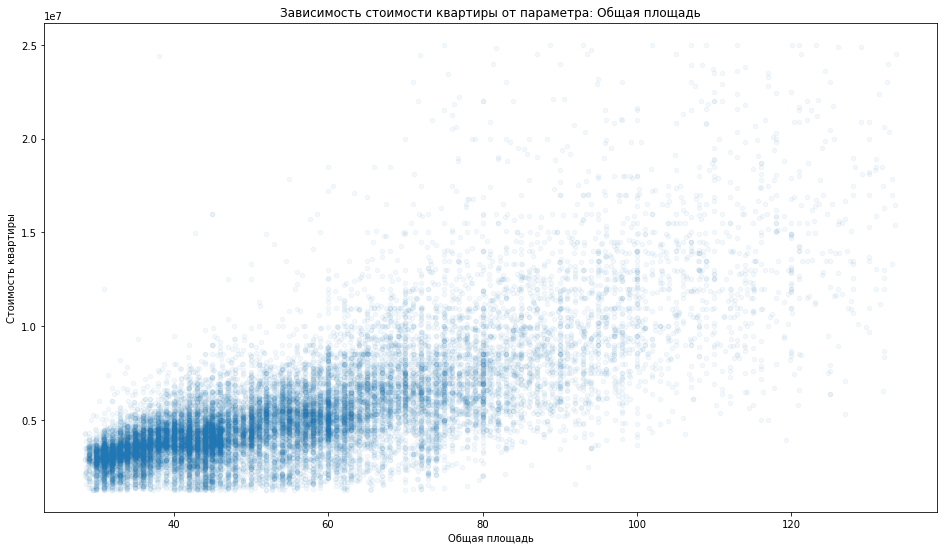

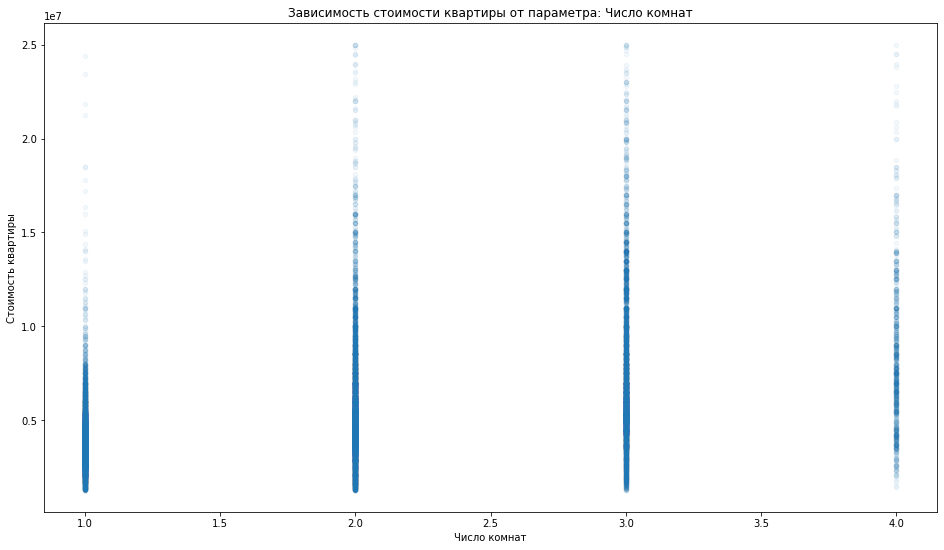

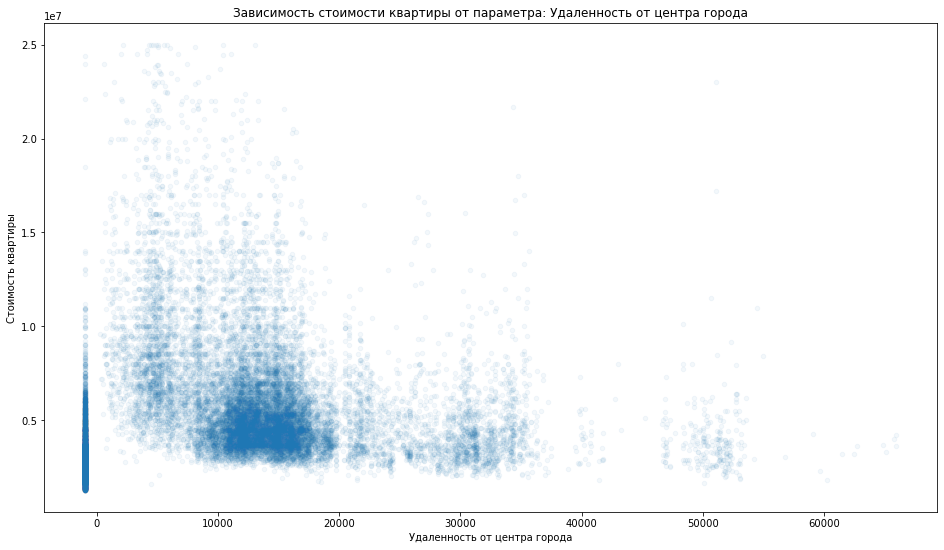

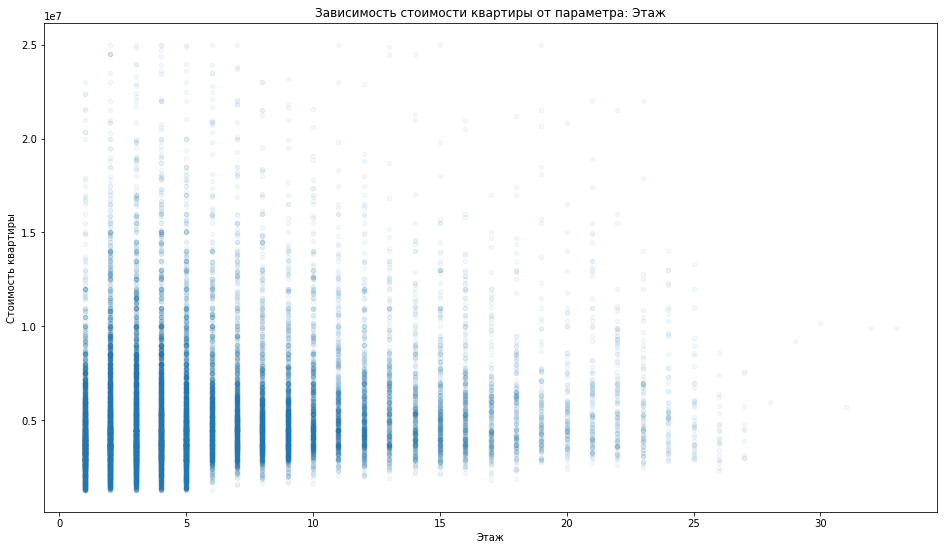

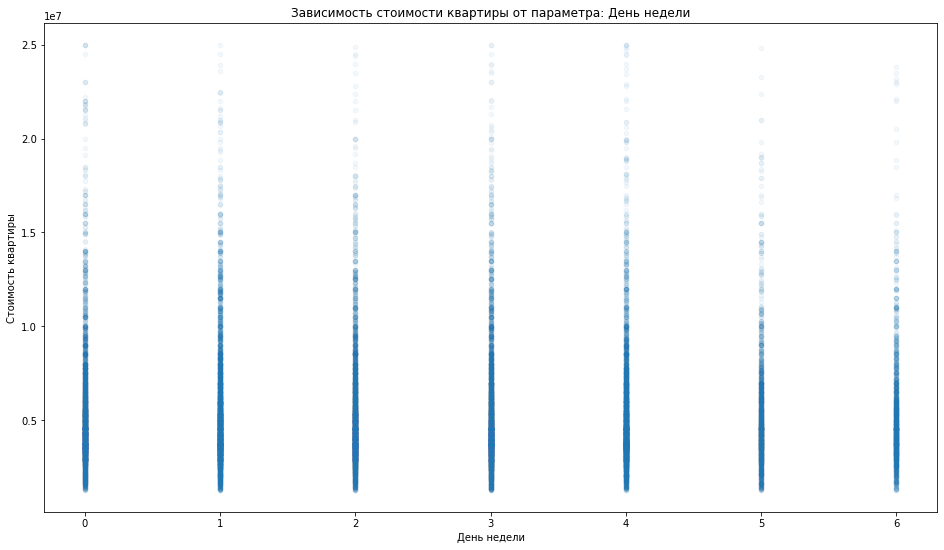

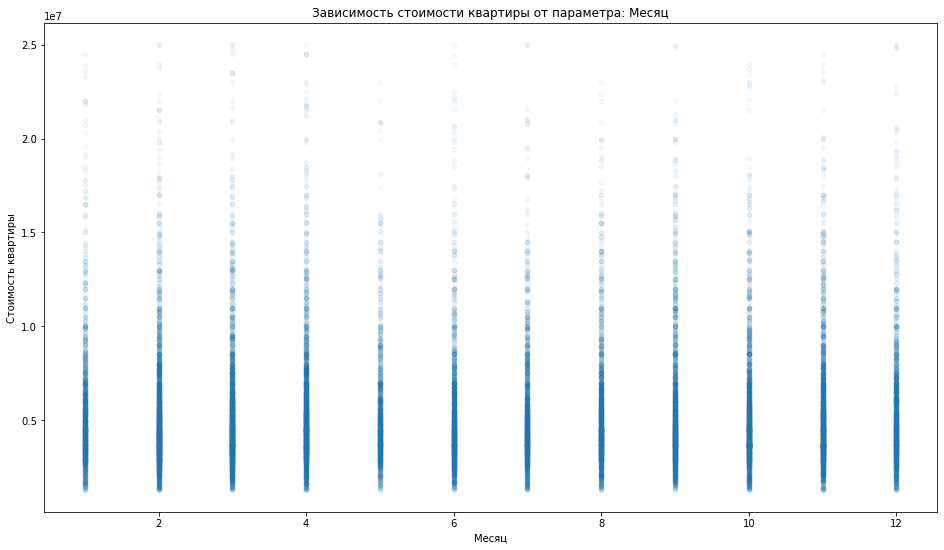

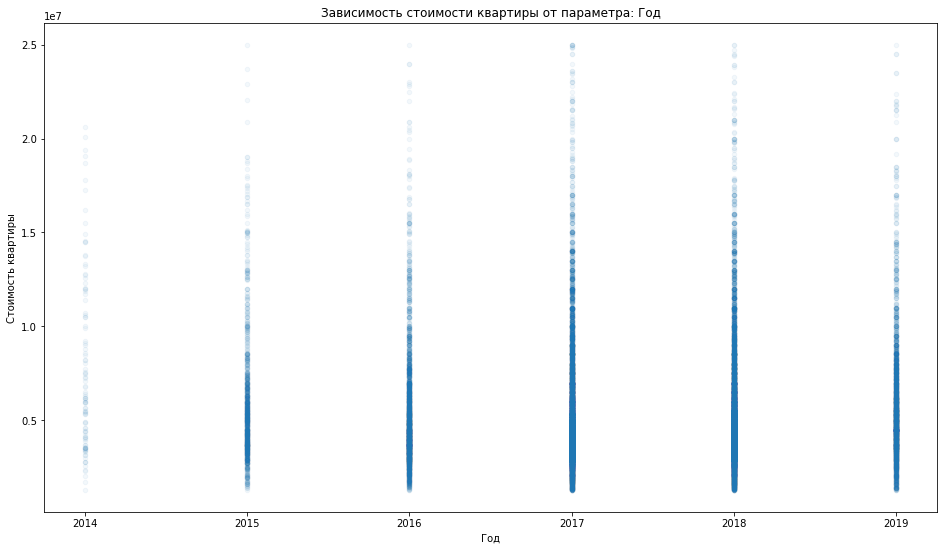

In [127]:
# построение графиков
for parameter in parameters_to_check:
    df_realty_clear.plot(x=parameter[0], alpha=0.05, y='last_price', kind='scatter')
    plt.title('Зависимость стоимости квартиры от параметра: {}'.format(parameter[1]))
    plt.xlabel(parameter[1])
    plt.ylabel('Стоимость квартиры')

### Промежуточный выводы: 
- общая площадь: зависимость увеличения цены с увеличением площади соблюдается до 100 м², а затем разброс цен расширяется.
- число комнат: наибольший диапазон цен наблюдается для квартир с 3 комнатами. Для квартир с 2 и 4 комнатами большая часть предложений находится в границах 15 млн руб., но для двухкомнатных квартир их больше. квартиры-студии наиболее дешевые — почти все до 5 млн руб.
- удалённость от центра: самые ходовые квартиры на рынке СПб и Лен. области — это предложения от 3 до 10 млн руб. в пределах 1-20 км от центра СПб. Наблюдается всплеск цены в центре СПб на радиусе 5 км — уверенно до 15 млн руб. и до 25 млн руб. больше, чем на других расстояниях. Также ярко выражены предложения в 30 и 50 км от СПб, но цена там ожидаемо ниже до 7-8 млн руб.
- День недели и месяц подачи объявления не оказывают существенного влияния на стоимость квартиры: __0.2-0.3 %__.
- Влияние года подачи объявления на стоимость квартиры более существенное: __- 4.3 %__. До 2017 г. наблюдается небольшой рост стоимостей квартиры, а после — снижение.

In [128]:
# общая корреляция стоимости квартиры от параметров
(df_realty_clear[['last_price',
     'total_area',
     'rooms',
     'cityCenters_nearest',
     'floor',
     'year',
     'month',
     'weekday']].copy()).corr().style.format("{:.1%}")

,last_price,total_area,rooms,cityCenters_nearest,floor,year,month,weekday
last_price,100.0%,74.1%,42.2%,2.3%,11.1%,-0.9%,0.3%,-1.7%
total_area,74.1%,100.0%,77.6%,-4.6%,-0.2%,-6.7%,1.2%,-1.9%
rooms,42.2%,77.6%,100.0%,-2.9%,-15.4%,-3.5%,0.1%,-0.8%
cityCenters_nearest,2.3%,-4.6%,-2.9%,100.0%,4.7%,-1.0%,-0.9%,0.4%
floor,11.1%,-0.2%,-15.4%,4.7%,100.0%,0.7%,1.7%,1.2%
year,-0.9%,-6.7%,-3.5%,-1.0%,0.7%,100.0%,-27.4%,0.1%
month,0.3%,1.2%,0.1%,-0.9%,1.7%,-27.4%,100.0%,1.0%
weekday,-1.7%,-1.9%,-0.8%,0.4%,1.2%,0.1%,1.0%,100.0%


### Анализ влияния населённого пункта на стоимость квартиры

In [129]:
# выбор 10 населённых пунктов с наибольшим числом объявлений с расчётом средней цены квадратного метра в этих населённых пунктах
first_ten_cities = pd.pivot_table(
    df_realty_clear, values='sq_meter_price', index='real_locality_name', aggfunc={'count', 'mean'}
).sort_values(by = 'count', ascending = False).reset_index()

In [130]:
# 10 населённых пунктов с наибольшим числом объявлений с расчётом средней цены квадратного метра в этих населённых пунктах
#print('Cредняя цена квадратного метра жилья в первых 10 населённых пунктах с наибольшим числом объявлений')
first_ten_cities.head(10).style.format({'mean': '{0:.0f}'})

,real_locality_name,count,mean
0,Санкт-Петербург,14086,109185
1,Мурино,515,84693
2,Кудрово,425,94661
3,Шушары,424,77838
4,Всеволожск,382,68728
5,Пушкин,338,101811
6,Колпино,330,75344
7,Парголово,319,90352
8,Гатчина,299,69515
9,Выборг,208,58616


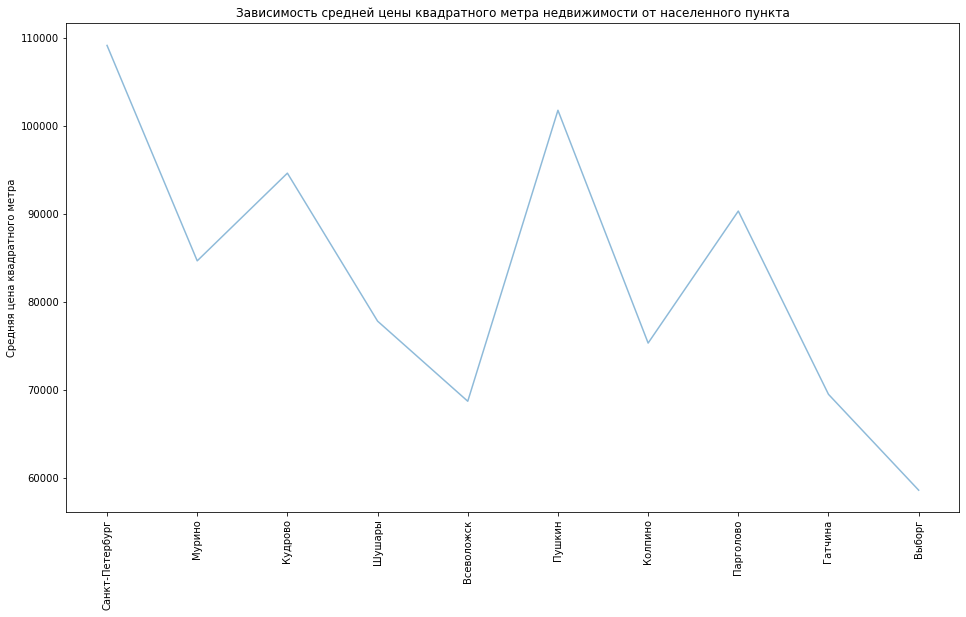

In [131]:
# построение графика зависимости цены от местоположения

# названия населенных пунктов для оси Х
xticks=first_ten_cities['real_locality_name'].head(10)

# формирование оси X
x=range(len(xticks))

# формирование оси Y
y=first_ten_cities['mean'].head(10)

#plt.figure(figsize=(50,30)) 
plt.plot(x,y, alpha=0.5)
# нанесение названий населенных пунктов на ось Х
plt.xticks(x,xticks, rotation=90)
plt.title('Зависимость средней цены квадратного метра недвижимости от населенного пункта')
plt.ylabel('Средняя цена квадратного метра')

plt.show()

In [132]:
print('В населенном пункте "{}" самая высокая цена квадратного метра жилья: {:.0f} руб./м²'.format(
    first_ten_cities.loc[first_ten_cities['mean'].idxmax, 'real_locality_name'],
    first_ten_cities['mean'].max()))

В населенном пункте "Зеленогорск" самая высокая цена квадратного метра жилья: 117811 руб./м²


In [133]:
print('В населенном пункте "{}" самая низкая цена квадратного метра жилья: {:.0f} руб./м²'.format(
    first_ten_cities.loc[first_ten_cities['mean'].idxmin, 'real_locality_name'],
    first_ten_cities['mean'].min()))

В населенном пункте "Торковичи" самая низкая цена квадратного метра жилья: 19048 руб./м²


### Промежуточный выводы: 
- Наибольшее количество объявлений о продаже недвижимости подано для Санкт-Петербурга, что ожидаемо. При этом распределение городов в первой десятке не коррелирует с их численностью. Например, в Мурино проживает около 65 тыс. чел.,в Выборге — 75 тыс. чел., а Гатчине — 92 тыс. чел., но объявлений о продаже недвижимости в Мурино больше, чем в Выборге и Гатчине примерно в 1.3 раза. Видимо, в Мурино идёт более активная застройка и социальный климат более благоприятный, так как средняя цена относительно высокая.
- В населенном пункте "Зеленогорск" самая высокая цена квадратного метра жилья: 117811 руб./м².
- В населенном пункте "Торковичи" самая низкая цена квадратного метра жилья: 19048 руб./м². Видимо, жители хотят уехать любой ценой.

### Изучение предложения квартир

In [134]:
# создание датафрейма записей по СПб: цена, удаление от центра
spb_price_analysis  = df_realty_clear[['last_price', 'cityCenters_nearest_km','real_locality_name']].copy()

In [135]:
# удаление записей с пропущенными значениями названий населенных пунктов
spb_price_analysis = spb_price_analysis.dropna(subset=['cityCenters_nearest_km'])

In [136]:
spb_price_analysis.drop(spb_price_analysis.query('real_locality_name != "Санкт-Петербург"').index, inplace=True)

In [137]:
# сводная таблица средней цены для каждого километра
spb_price_km = pd.pivot_table(
    spb_price_analysis, values='last_price', index='cityCenters_nearest_km', aggfunc={'mean'}).reset_index()

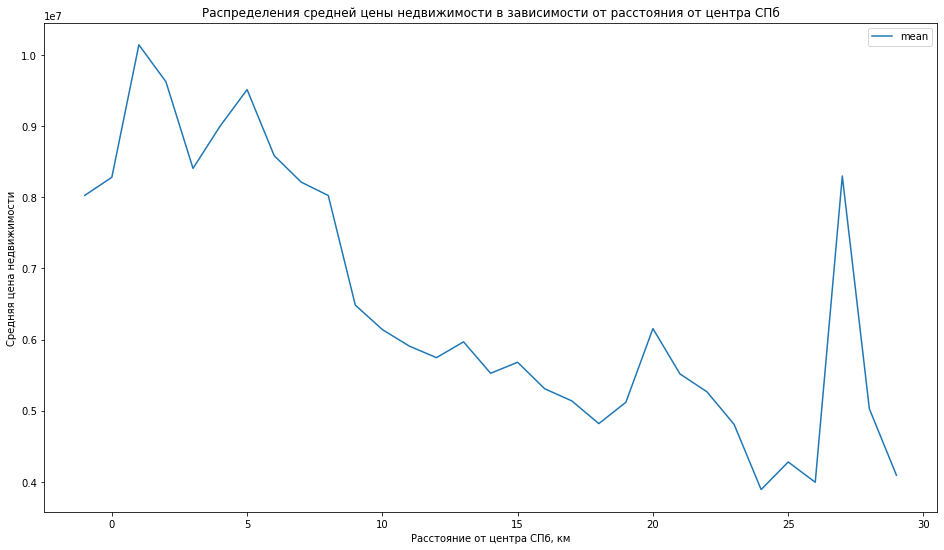

In [138]:
# график распределения среденей цены недвижимости в зависимости от расстояния до центра
spb_price_km.plot(x='cityCenters_nearest_km', y='mean')
plt.title('Распределения средней цены недвижимости в зависимости от расстояния от центра СПб')
plt.xlabel('Расстояние от центра СПб, км')
plt.ylabel('Средняя цена недвижимости')
plt.show()

### Вывод: 
Центральная зона СПб расположена в пределах радиуса 8 км от центра.

In [139]:
# объявление переменных начала и конца центральной зоны СПб
spb_center_end = 8

### Анализ квартир в центре СПб

In [140]:
# выборка квартир в центре СПб
spb_center = df_realty_clear[
    (df_realty_clear['real_locality_name'] == "Санкт-Петербург") & \
    (df_realty_clear['cityCenters_nearest_km'] == spb_center_end)
]

In [141]:
# выборка квартир вне центра СПб
spb_suburban = df_realty_clear[
    (df_realty_clear['real_locality_name'] == "Санкт-Петербург") & \
    (df_realty_clear['cityCenters_nearest_km'] > spb_center_end)
]

In [142]:
# выборка квартир в центре СПб
spb_all = df_realty_clear.query('real_locality_name == "Санкт-Петербург"')

In [143]:
# доля квартир в центре, которые не учитываются в выборке
print('Предложения в центре СПб — это {:.0%} от всех объявлений о продаже недвижимости в городе.'.format(len(spb_center)/len(spb_all)))

Предложения в центре СПб — это 4% от всех объявлений о продаже недвижимости в городе.


In [144]:
# параметры к изучению и проверке
parameters_spb_general_check = [
    ['total_area', 'Площадь недвижимости'],
    ['last_price', 'Цена'],
    ['rooms', 'Число комнат'],
    ['ceiling_height', 'Высота потолков']
]

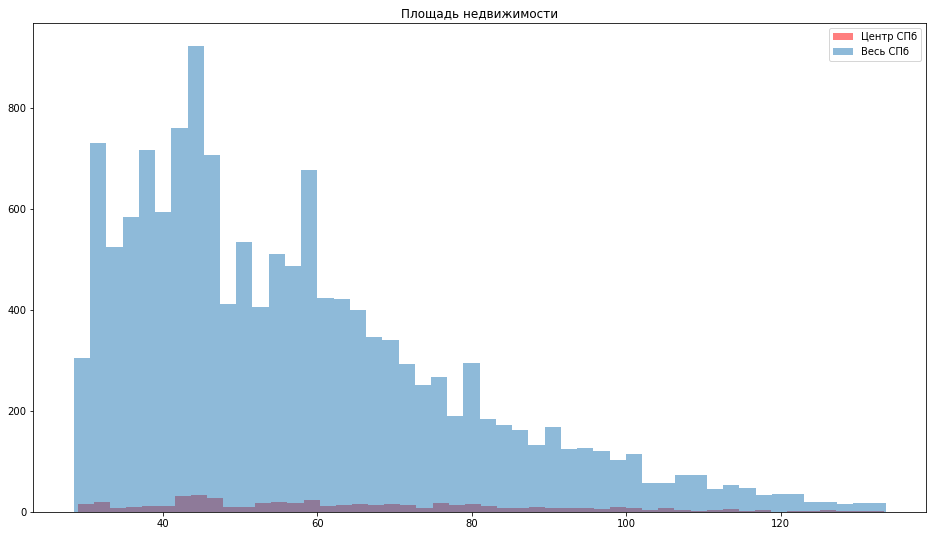

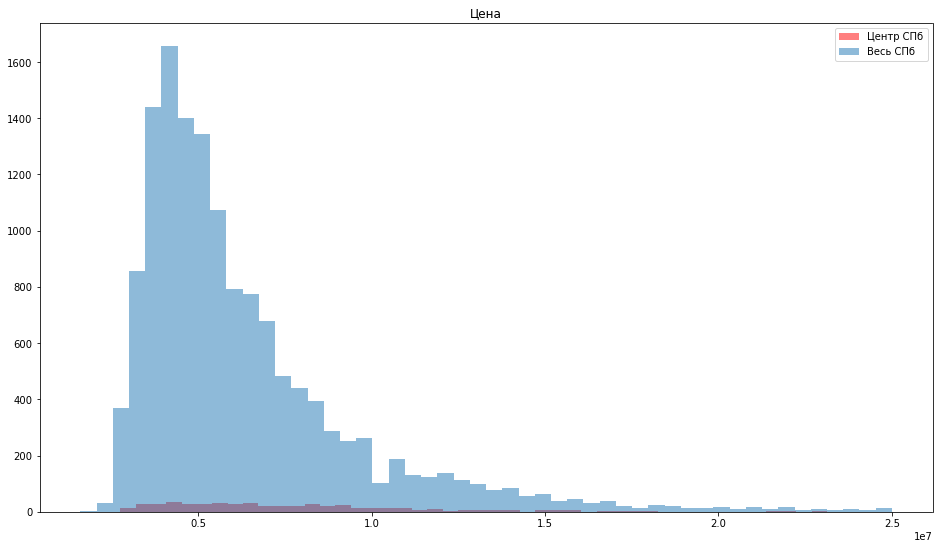

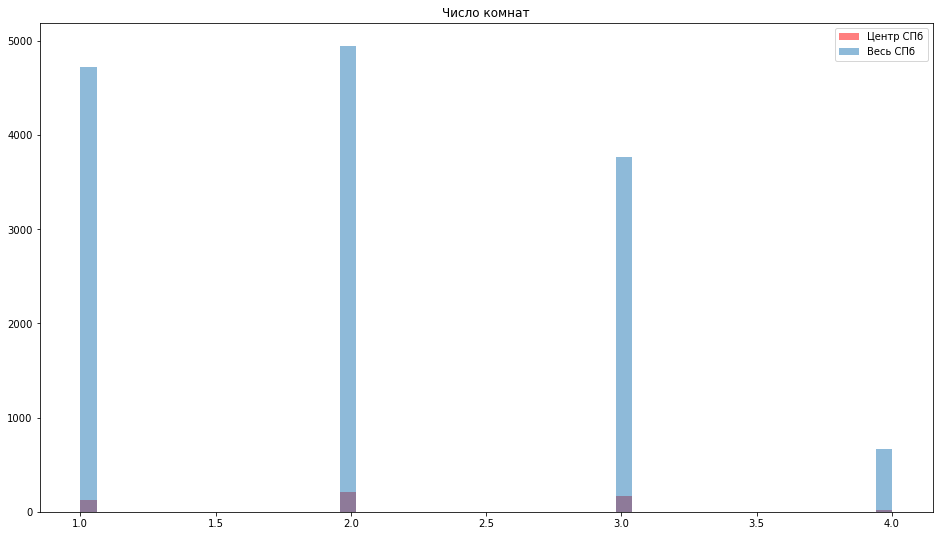

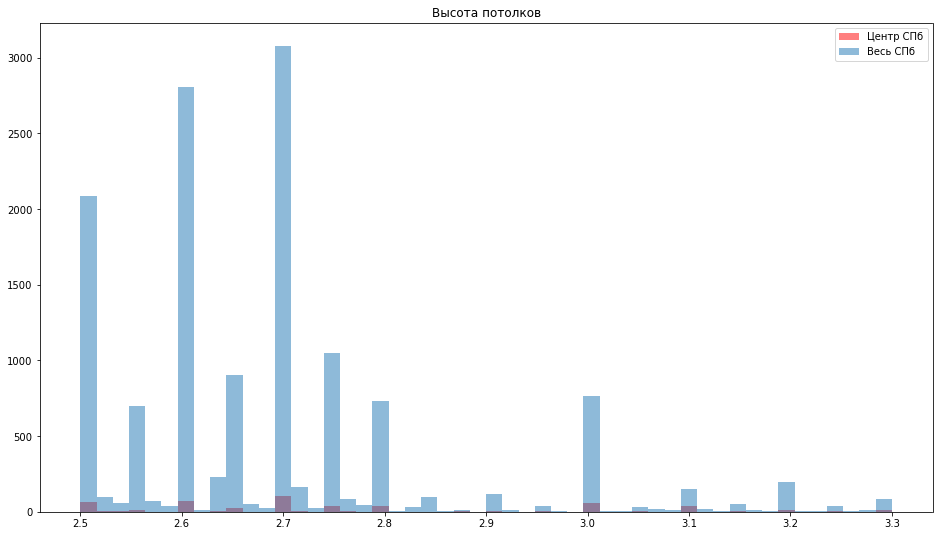

In [145]:
# Построение гистограмм для каждого параметра
for parameter in parameters_spb_general_check:   
    
    plt.hist(
        spb_center[parameter[0]],
        bins = 50,
        alpha=0.5,
        label=('Центр СПб'),
        color=['red']
    )
    
    plt.hist(
        spb_all[parameter[0]],
        bins = 50,
        alpha=0.5,
        label=('Весь СПб')
    )
    
    plt.legend(loc='upper right')
    plt.title(parameter[1])
    plt.show()

In [146]:
# параметры к проверке влияния на стоимость квартиры
parameters_spb_price_check = [['rooms', 'Число комнат'],
                              ['floor', 'Этаж'],
                              ['cityCenters_nearest_km', 'Удаленность от центра'],
                              ['year', 'Год размещения объявления']
                             ]

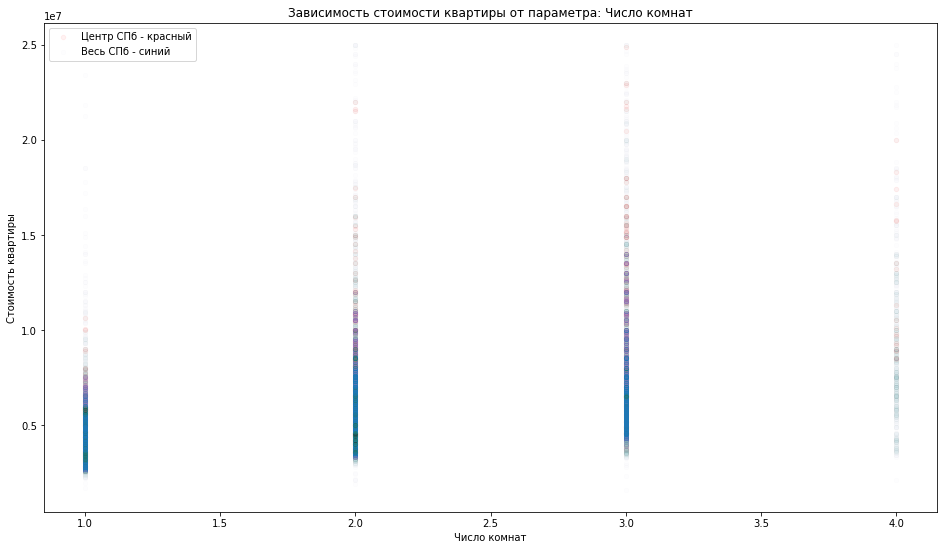

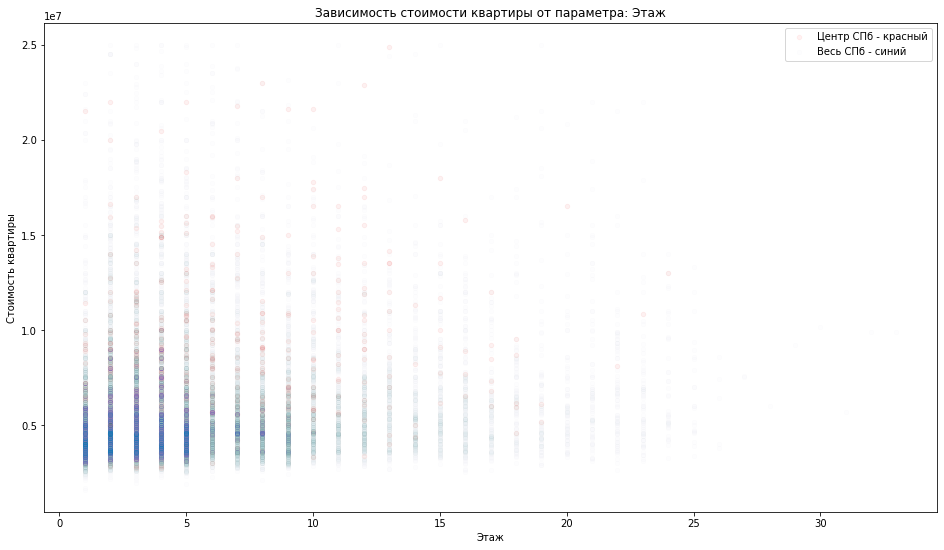

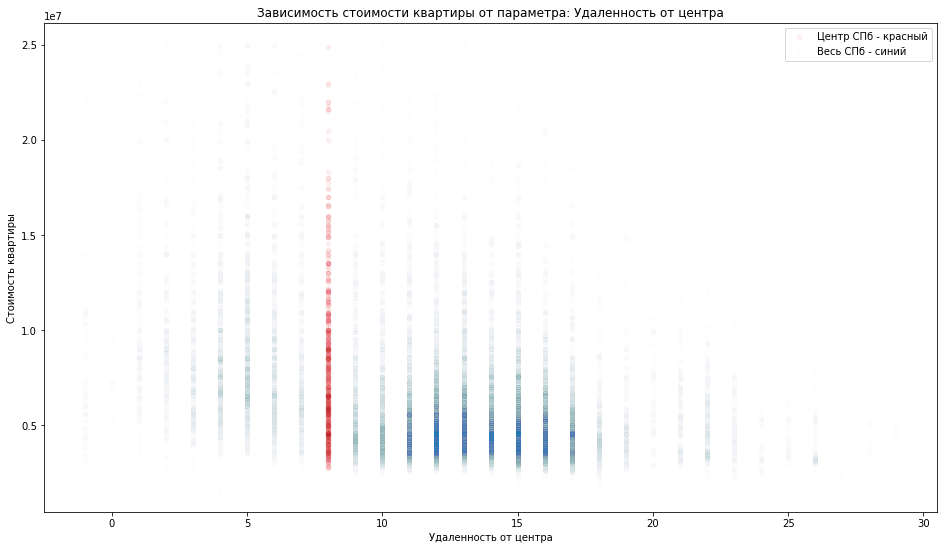

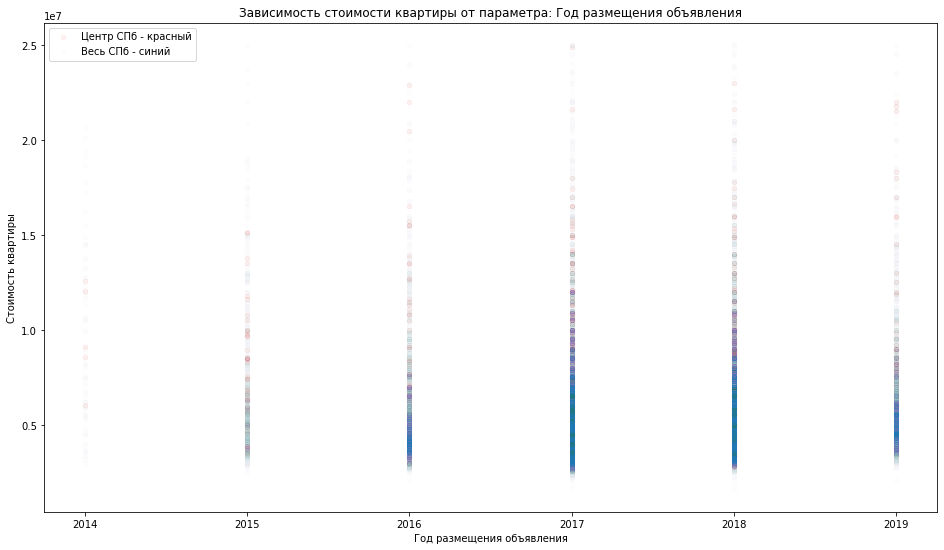

In [147]:
for parameter in parameters_spb_price_check:
    # центр СПб
   # fig = plt.figure()
    ax = plt.subplot()

    
    ax = plt.gca()
        
    
    spb_center.plot(
        x=parameter[0],
        alpha=0.05,
        y='last_price',
        kind='scatter',
        color=['red'],
        label=('Центр СПб - красный'),
        ax = ax
    ).autoscale('y')

    
    spb_all.plot(
        x=parameter[0], 
        alpha=0.007, 
        y='last_price', 
        kind='scatter',
        label=('Весь СПб - синий'),
        ax = ax
    ).autoscale('y')
    
    plt.title('Зависимость стоимости квартиры от параметра: {}'.format(parameter[1]))
    plt.xlabel(parameter[1])
    plt.ylabel('Стоимость квартиры')
    plt.show()
    

### Вывод: 
- __Общий анализ параметров:__
    - площадь: в центре СПб распределение площади квартир сдвинуто ближе к серидине выборки: 60-80 м² с ярко выраженным всплеском на уровне 45 м². Для всего города этот всплеск на 45 м² остаётся, но распределение равномерно уменьшается от 30 до 120 м².
    - цена: пик цены для центра СПб приходится на 6 млн руб, в то время как для всего СПб пик цены недвижимости на 4 млн руб.
    - число комнат: в центре СПб больше всего двух- и трехкомнатных квартир, а для всего города лидируют однокомнатные квартиры.
    - высота потолков: квартиры с потолками 2,6-2,7 м находятся на первом места как для центра СПб, так и для всего города. Характерное отличие центра СПб — это множество потолков высотой 3 м (видимо, сказывается влияние старой застройки), в то время как во всём городе на втором месте потолки "хрущевок" высотой 2,5 м. 

- __Влияние параметров на стоимость недвижимости:__
    - число комнат: для центра СПб характерен чуть более сдержанный диапазон цен в зависимости от количества комнат, чем во всём городе.
    - этаж: высокой застроки в центре СПб меньше, чем во всем городе — объявлений меньше, но с ростом этажа разброс стоимости в центре СПб снижается не так сильно, как во всем городе.
    - удалённость от центра: тренд един для центра и всего СПб — чем дальше квартира от центра, тем она дешевле.
    - дата размещения объявления: для центра и всего СПб характерно небольшое снижение стоимости квартир , начиная с 2017 г.

In [148]:
# общая корреляция стоимости квартиры от параметров для центра СПб
(spb_center[['last_price',
     'total_area',
     'rooms',
     'floor',
     'ceiling_height',
     'cityCenters_nearest_km',
     'year']].copy()).corr().style.format("{:.1%}")

,last_price,total_area,rooms,floor,ceiling_height,cityCenters_nearest_km,year
last_price,100.0%,81.6%,51.2%,26.8%,31.7%,nan%,-1.1%
total_area,81.6%,100.0%,78.0%,14.7%,35.8%,nan%,-4.9%
rooms,51.2%,78.0%,100.0%,-4.7%,22.4%,nan%,-0.9%
floor,26.8%,14.7%,-4.7%,100.0%,2.8%,nan%,-5.3%
ceiling_height,31.7%,35.8%,22.4%,2.8%,100.0%,nan%,-9.6%
cityCenters_nearest_km,nan%,nan%,nan%,nan%,nan%,nan%,nan%
year,-1.1%,-4.9%,-0.9%,-5.3%,-9.6%,nan%,100.0%


In [149]:
# общая корреляция стоимости квартиры от параметров для всего СПб
(spb_all[['last_price',
     'total_area',
     'rooms',
     'floor',
     'ceiling_height',
     'cityCenters_nearest_km',
     'year']].copy()).corr().style.format("{:.1%}")

,last_price,total_area,rooms,floor,ceiling_height,cityCenters_nearest_km,year
last_price,100.0%,79.7%,46.1%,5.8%,40.1%,-37.2%,-0.4%
total_area,79.7%,100.0%,76.6%,-0.2%,33.9%,-25.1%,-7.7%
rooms,46.1%,76.6%,100.0%,-15.7%,9.9%,-16.9%,-4.0%
floor,5.8%,-0.2%,-15.7%,100.0%,3.9%,19.8%,0.9%
ceiling_height,40.1%,33.9%,9.9%,3.9%,100.0%,-33.2%,-4.8%
cityCenters_nearest_km,-37.2%,-25.1%,-16.9%,19.8%,-33.2%,100.0%,6.2%
year,-0.4%,-7.7%,-4.0%,0.9%,-4.8%,6.2%,100.0%


## Выводы и рекомендации
<a id = "conclusion"></a>
[В оглавление](#index)

__Поставленная задача:__ определение рыночной стоимости объектов недвижимости.

#### Предобработка данных
- Основные параметры, по которым отсутствуют пропуски (и судя по всему по ним в первую очередь формировалась выгрузка): __last_price__, __total_area__, __first_day_exposition__. 
- По иным параметрам, в том числе критичным для анализа __locality_name__, наблюдаются пропуски.
- Часть пропусков обусловлена некорректным и неполным вводом данных пользователями при подаче объявлений.
- Часть пропусков обусловлена некорректным автоматическим заполнением. Данные заполняются автоматически прежде всего для СПб, районов СПб и крупных городов. При этом пропуски автоматического заполнения встречаются как в СПб, так и в других крупных городах: Выборг, Гатчина.
- Для проверки сформированы датафреймы с индексами и причинами, которые необходимо дополнительно проверить по компетенции:
    -  __indexes_to_check__ — общая техническая проверка;
    - __bad_automation_check__ — проверка автоматического заполнения на основе картографических данных.
- По части столбцов типы данных не соответствуют логике столбцов и требуется преобразование.    
#### Дополнительные расчеты
- Дополнительные столбцы для анализа добавлены согласно заданию.
#### Исследовательский анализ данных
- Общее
    - Центральная зона СПб расположена в пределах 5 ± 2,5 км.

- Количество объявлений
    - Наибольшее количество объявлений о продаже недвижимости подано для Санкт-Петербурга — 67%.
    - Количество объявлений для населенного пункта __не коррелирует__ с численностью населения. Например, в Мурино проживает около 65 тыс. чел.,в Выборге — 75 тыс. чел., а Гатчине — 92 тыс. чел., но объявлений о продаже недвижимости в Мурино больше, чем в Выборге и Гатчине примерно в 1.3 раза. Видимо, в Мурино идёт более активная застройка и социальный климат более благоприятный, так как средняя цена относительно высокая.
- Цена
    - Распределение цены продажи квартир похоже на распределение Пуассона с пиком на цене около 4 млн руб. Для центра СПб характерны квартиры со средней стоимостью 6 млн руб.
    - Самая высокая цена квадратного метра жилья: 117811 руб./м² (Зеленогорск).
    - Самая низкая цена квадратного метра жилья: 19048 руб./м² (Торковичи).
    - День недели и месяц подачи объявления не оказывают существенного влияния на стоимость квартиры: 0,3 %. Влияние года подачи объявления на стоимость квартиры более существенное: - 4,3 %. До 2017 г. наблюдается небольшой рост стоимостей квартиры, а после — снижение.
    - Удалённость от центра: самые ходовые квартиры на рынке СПб и Лен. области — это предложения от 3 до 10 млн руб. в пределах 1-20 км от центра СПб. Наблюдается всплеск цены в центре СПб на радиусе 5 км — уверенно до 15 млн руб. и до 25 млн руб. больше, чем на других расстояниях. Также ярко выражены предложения в 30 и 50 км от СПб, но цена там ожидаемо ниже до 7-8 млн руб.
- Время продажи
    - Медианное время продажи квартиры — 95 дней. В отдельных случаях продажи недвижимости могут длиться более года. Это характерно для элитных предложений в центре СПб или наоборот в малых населенных пунктах.
- Площадь, высота потолков, количество комнат
    - В относительно равномерном распределении объявлений по общей площади наблюдается 3 пика 25-45-60 м², которые коррелируют с количеством комнат в квартире. В центре СПб распределение площади квартир сдвинуто ближе к серидине выборки: 60-80 м² с ярко выраженным всплеском на уровне 45 м². Для всего города этот всплеск на 45 м² остаётся, но распределение равномерно уменьшается от 30 до 120 м².
    - По 34% всех объявлений приходится на квартиры с 1 и 2 комнатами. Квартиры с 3 комнатами занимают 25%, с 4 комнатами: 5%. Доля квартир с количеством комнат более 4: 2%. В центре СПб больше всего двух- и трехкомнатных квартир, а по всему городу лидируют однокомнатные квартиры. Наибольший диапазон цен наблюдается для квартир с 3 комнатами. Для квартир с 2 и 4 комнатами большая часть предложений находится в границах 15 млн руб., но для двухкомнатных квартир их больше. квартиры-студии наиболее дешевые — почти все до 5 млн руб.
    - В объявлениях о продаже квартир по СПб и Лен. области наиболее распространены предложения с высотой потолков 2.5-2.7 м. Характерное отличие центра СПб — это множество потолков высотой 3 м (видимо, сказывается влияние старой застройки), в то время как во всём городе на втором месте потолки "хрущевок" высотой 2,5 м. 
- Этаж
    - Высокой застроки в центре СПб меньше, чем во всем городе — объявлений меньше, но с ростом этажа разброс стоимости в центре СПб снижается не так сильно, как во всем городе.